# Baseball Case Study

### Problem Statement:  
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

-- Output: Number of predicted wins (W)

In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset

df=pd.read_csv('Baseball.csv')
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


### Exploratory Data Analysis(EDA)

In [3]:
df.head()  #Checking the top 5 rows

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [4]:
df.tail()  #Checking the bottom 5 rows

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
25,92,667,5385,1346,263,26,187,563,1258,59,595,553,3.44,6,21,47,75
26,84,696,5565,1486,288,39,136,457,1159,93,627,597,3.72,7,18,41,78
27,79,720,5649,1494,289,48,154,490,1312,132,713,659,4.04,1,12,44,86
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92
29,68,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95


In [5]:
df.info() # Checking the dataset information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


All data is integer data type except ERA(Earned Run Average) is a float data type

In [6]:
df.dtypes  #Checking the data types of each column

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

In [7]:
df.sample(5)  #Checking the random 5 samples

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
26,84,696,5565,1486,288,39,136,457,1159,93,627,597,3.72,7,18,41,78
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
17,97,689,5491,1341,272,30,171,567,1518,95,608,546,3.36,6,21,48,111
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [8]:
df.value_counts()

W    R    AB    H     2B   3B  HR   BB   SO    SB   RA   ER   ERA   CG  SHO  SV  E  
63   626  5529  1374  272  37  130  387  1274  88   809  749  4.69  1   7    35  117    1
64   640  5571  1382  257  27  167  496  1255  134  754  700  4.33  2   8    35  90     1
98   697  5631  1462  292  27  140  461  1322  98   596  532  3.21  0   13   54  122    1
97   689  5491  1341  272  30  171  567  1518  95   608  546  3.36  6   21   48  111    1
95   724  5575  1497  300  42  139  383  973   104  641  601  3.73  2   8    56  88     1
93   891  5509  1480  308  17  232  570  1151  88   670  609  3.80  7   10   34  88     1
92   667  5385  1346  263  26  187  563  1258  59   595  553  3.44  6   21   47  75     1
90   683  5527  1351  295  17  177  488  1290  51   613  557  3.43  1   14   50  88     1
88   751  5511  1419  279  32  172  503  1233  101  733  680  4.24  5   9    45  119    1
87   764  5567  1397  272  19  212  554  1227  63   698  652  4.03  3   4    48  93     1
86   729  5459 

In [9]:
df.shape  # Checking the shape of the dataset

(30, 17)

In [10]:
df.isnull()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
df.isnull().sum() #Checking the null value in data

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

There is no null value present in the dataset

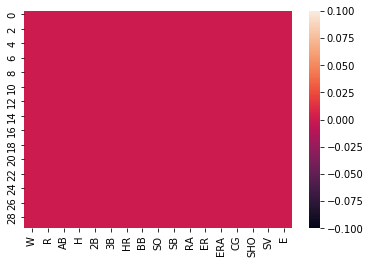

In [12]:
sns.heatmap(df.isnull())  # Viewing the visual representation of the null value

As we see in the heatmap it is all clear, no null value present. Good to proceed further

In [13]:
df['W'].value_counts() # Checking the count of Winning

68     3
83     2
74     2
76     2
81     2
64     1
93     1
92     1
90     1
88     1
87     1
86     1
85     1
84     1
80     1
97     1
100    1
78     1
63     1
79     1
71     1
67     1
98     1
95     1
Name: W, dtype: int64

As we see wining of 68 occurs 3 times, 83,74,76,81 occurs 2 times and the rest of winings occurs only one time

In [14]:
df['R'].value_counts() #Checking the counts of Runs

696    2
689    2
640    1
644    1
720    1
573    1
764    1
891    1
697    1
694    1
626    1
751    1
622    1
748    1
683    1
613    1
737    1
669    1
667    1
729    1
661    1
724    1
656    1
655    1
650    1
713    1
647    1
703    1
Name: R, dtype: int64

In [15]:
df.nunique() #Checking the unique value

W      24
R      28
AB     29
H      29
2B     22
3B     23
HR     27
BB     29
SO     29
SB     27
RA     30
ER     30
ERA    30
CG      9
SHO    12
SV     20
E      21
dtype: int64

In [16]:
df.describe() #Checking the description of data

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


### Correlation

In [17]:
df.corr() # Checking the correlation of data

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


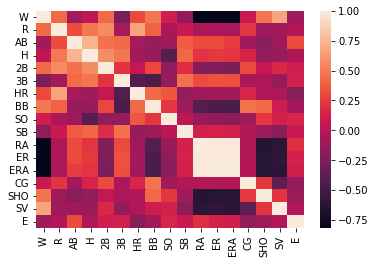

In [18]:
sns.heatmap(df.corr())

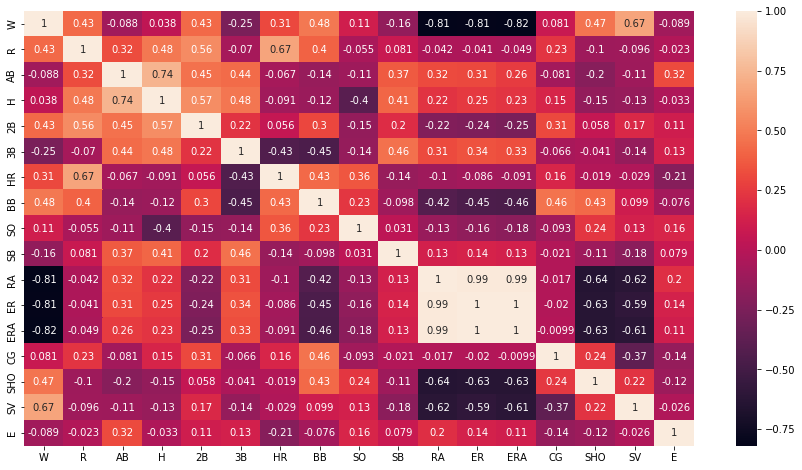

In [19]:
plt.figure(figsize=(15,8))            #Viewing Correlation through heatmap
sns.heatmap(df.corr(),annot=True)

# Visualization of Data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E13DF22988>,
      dtype=object)

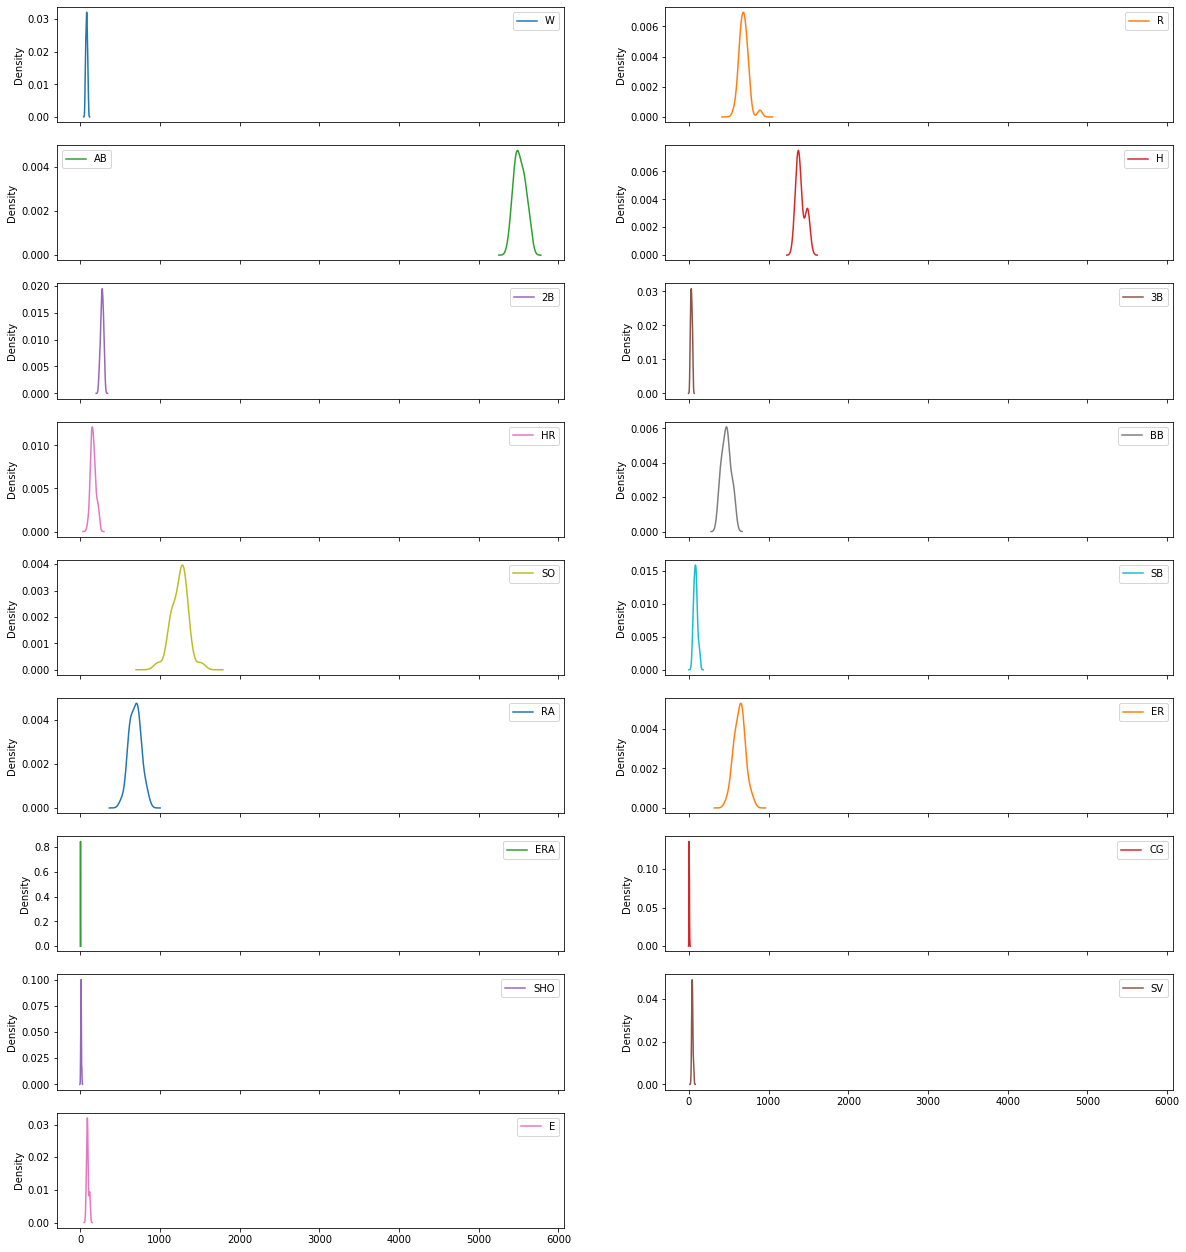

In [20]:
# Checking the kernel density estimator
df.plot(kind='kde',subplots=True,layout=(10,2),figsize=(20,25))

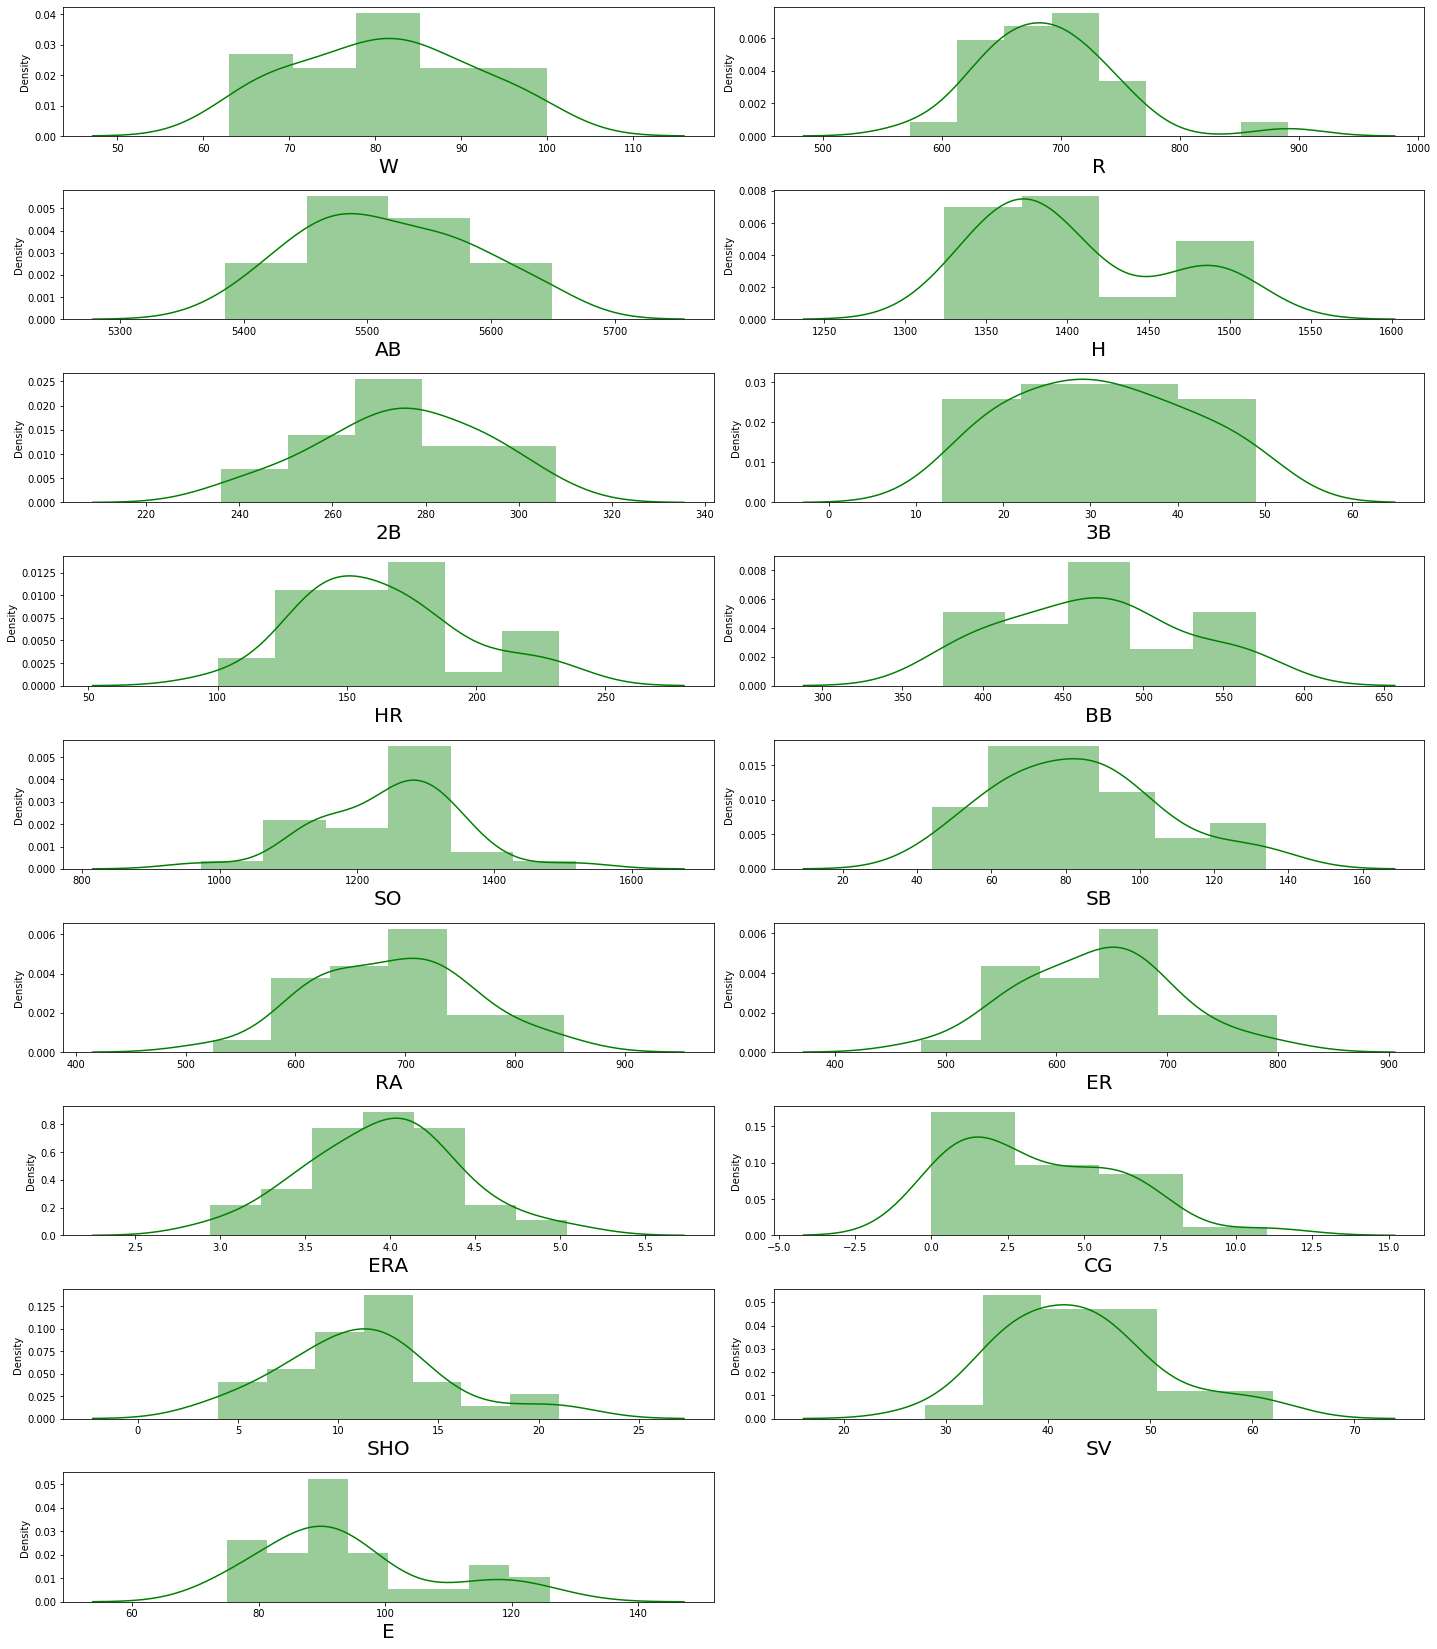

In [21]:
#Viewing the data through Distribution Plot
plt.figure(figsize=(20,25))
plotnumber=1

for column in df:
    if plotnumber<=17:
        ax=plt.subplot(10,2,plotnumber)
        sns.distplot(df[column],color='green')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
    
plt.tight_layout()
plt.show()

In the distribution plot we see that skewness is present in data

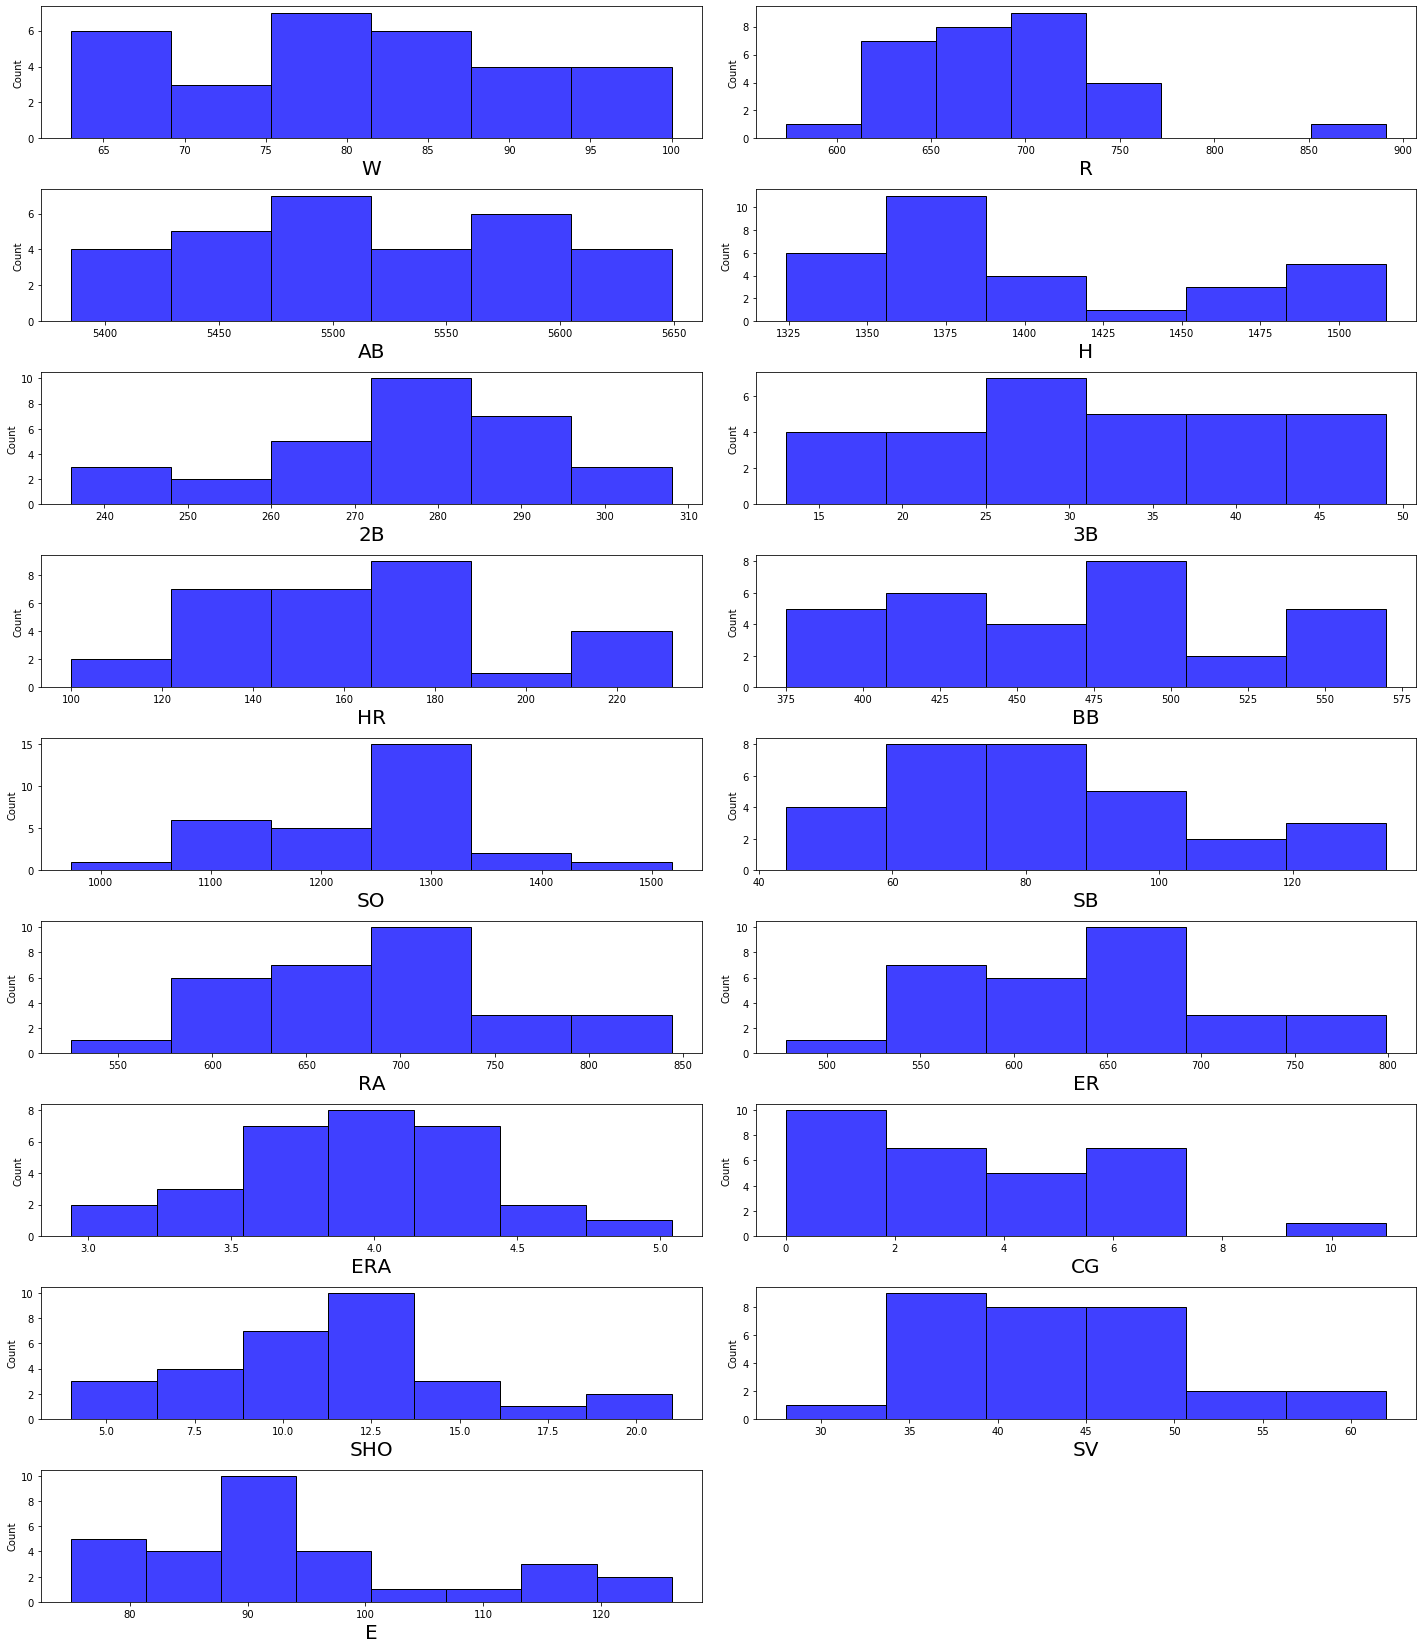

In [22]:
# Viewing the data through Histogram plot
plt.figure(figsize=(20,25))
plotnumber=1

for column in df:
    if plotnumber<=17:
        ax=plt.subplot(10,2,plotnumber)
        sns.histplot(df[column],color='blue')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
    
plt.tight_layout()
plt.show()

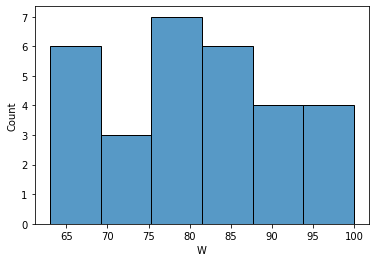

In [23]:
sns.histplot(df['W'])  #Viewing the Wining data through histogram

In the range 75-82 the wining rate is high

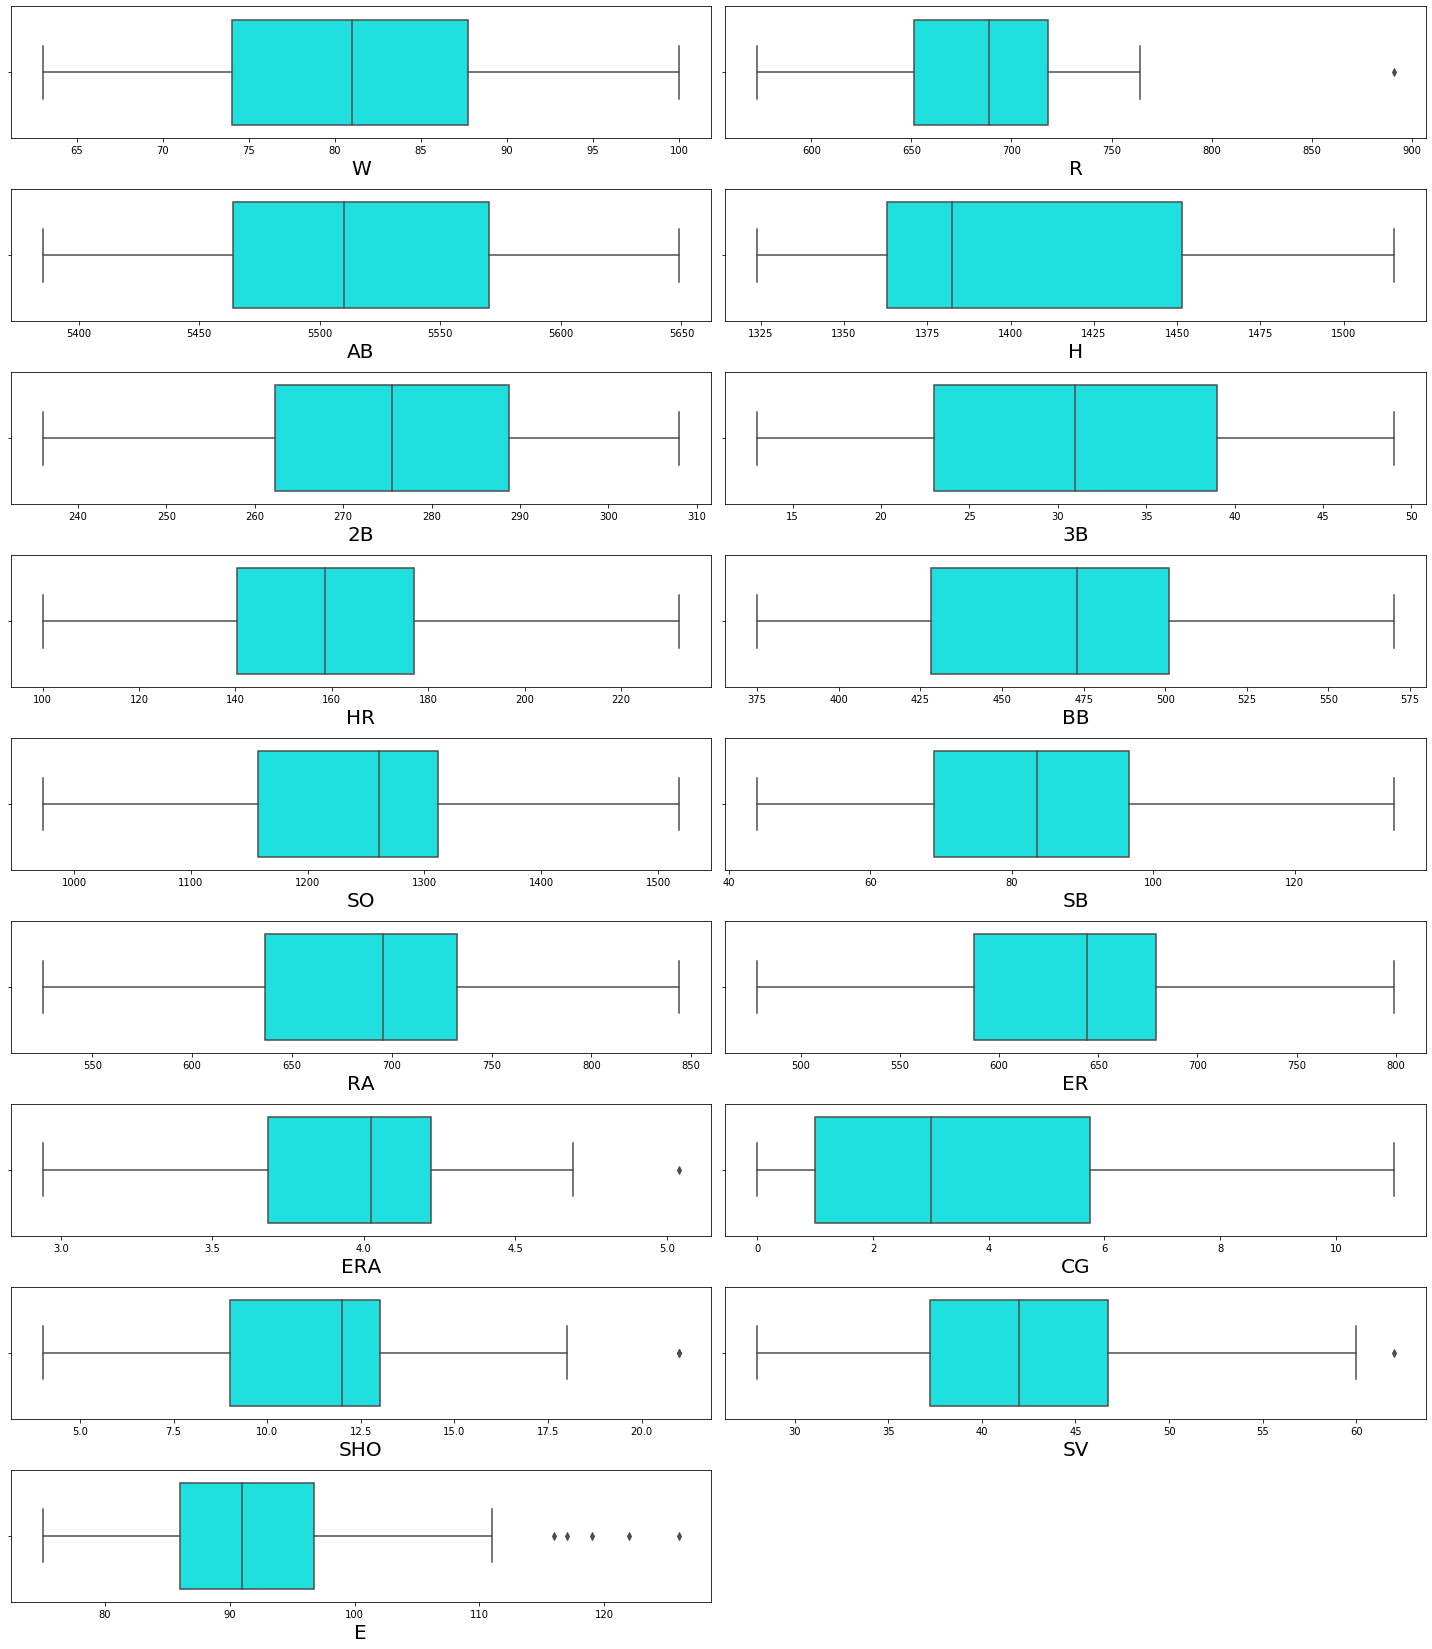

In [24]:
# Viewing the data through box plot
plt.figure(figsize=(20,25))
plotnumber=1

for column in df:
    if plotnumber<=17:
        ax=plt.subplot(10,2,plotnumber)
        sns.boxplot(df[column],color='aqua')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
    
plt.tight_layout()
plt.show()

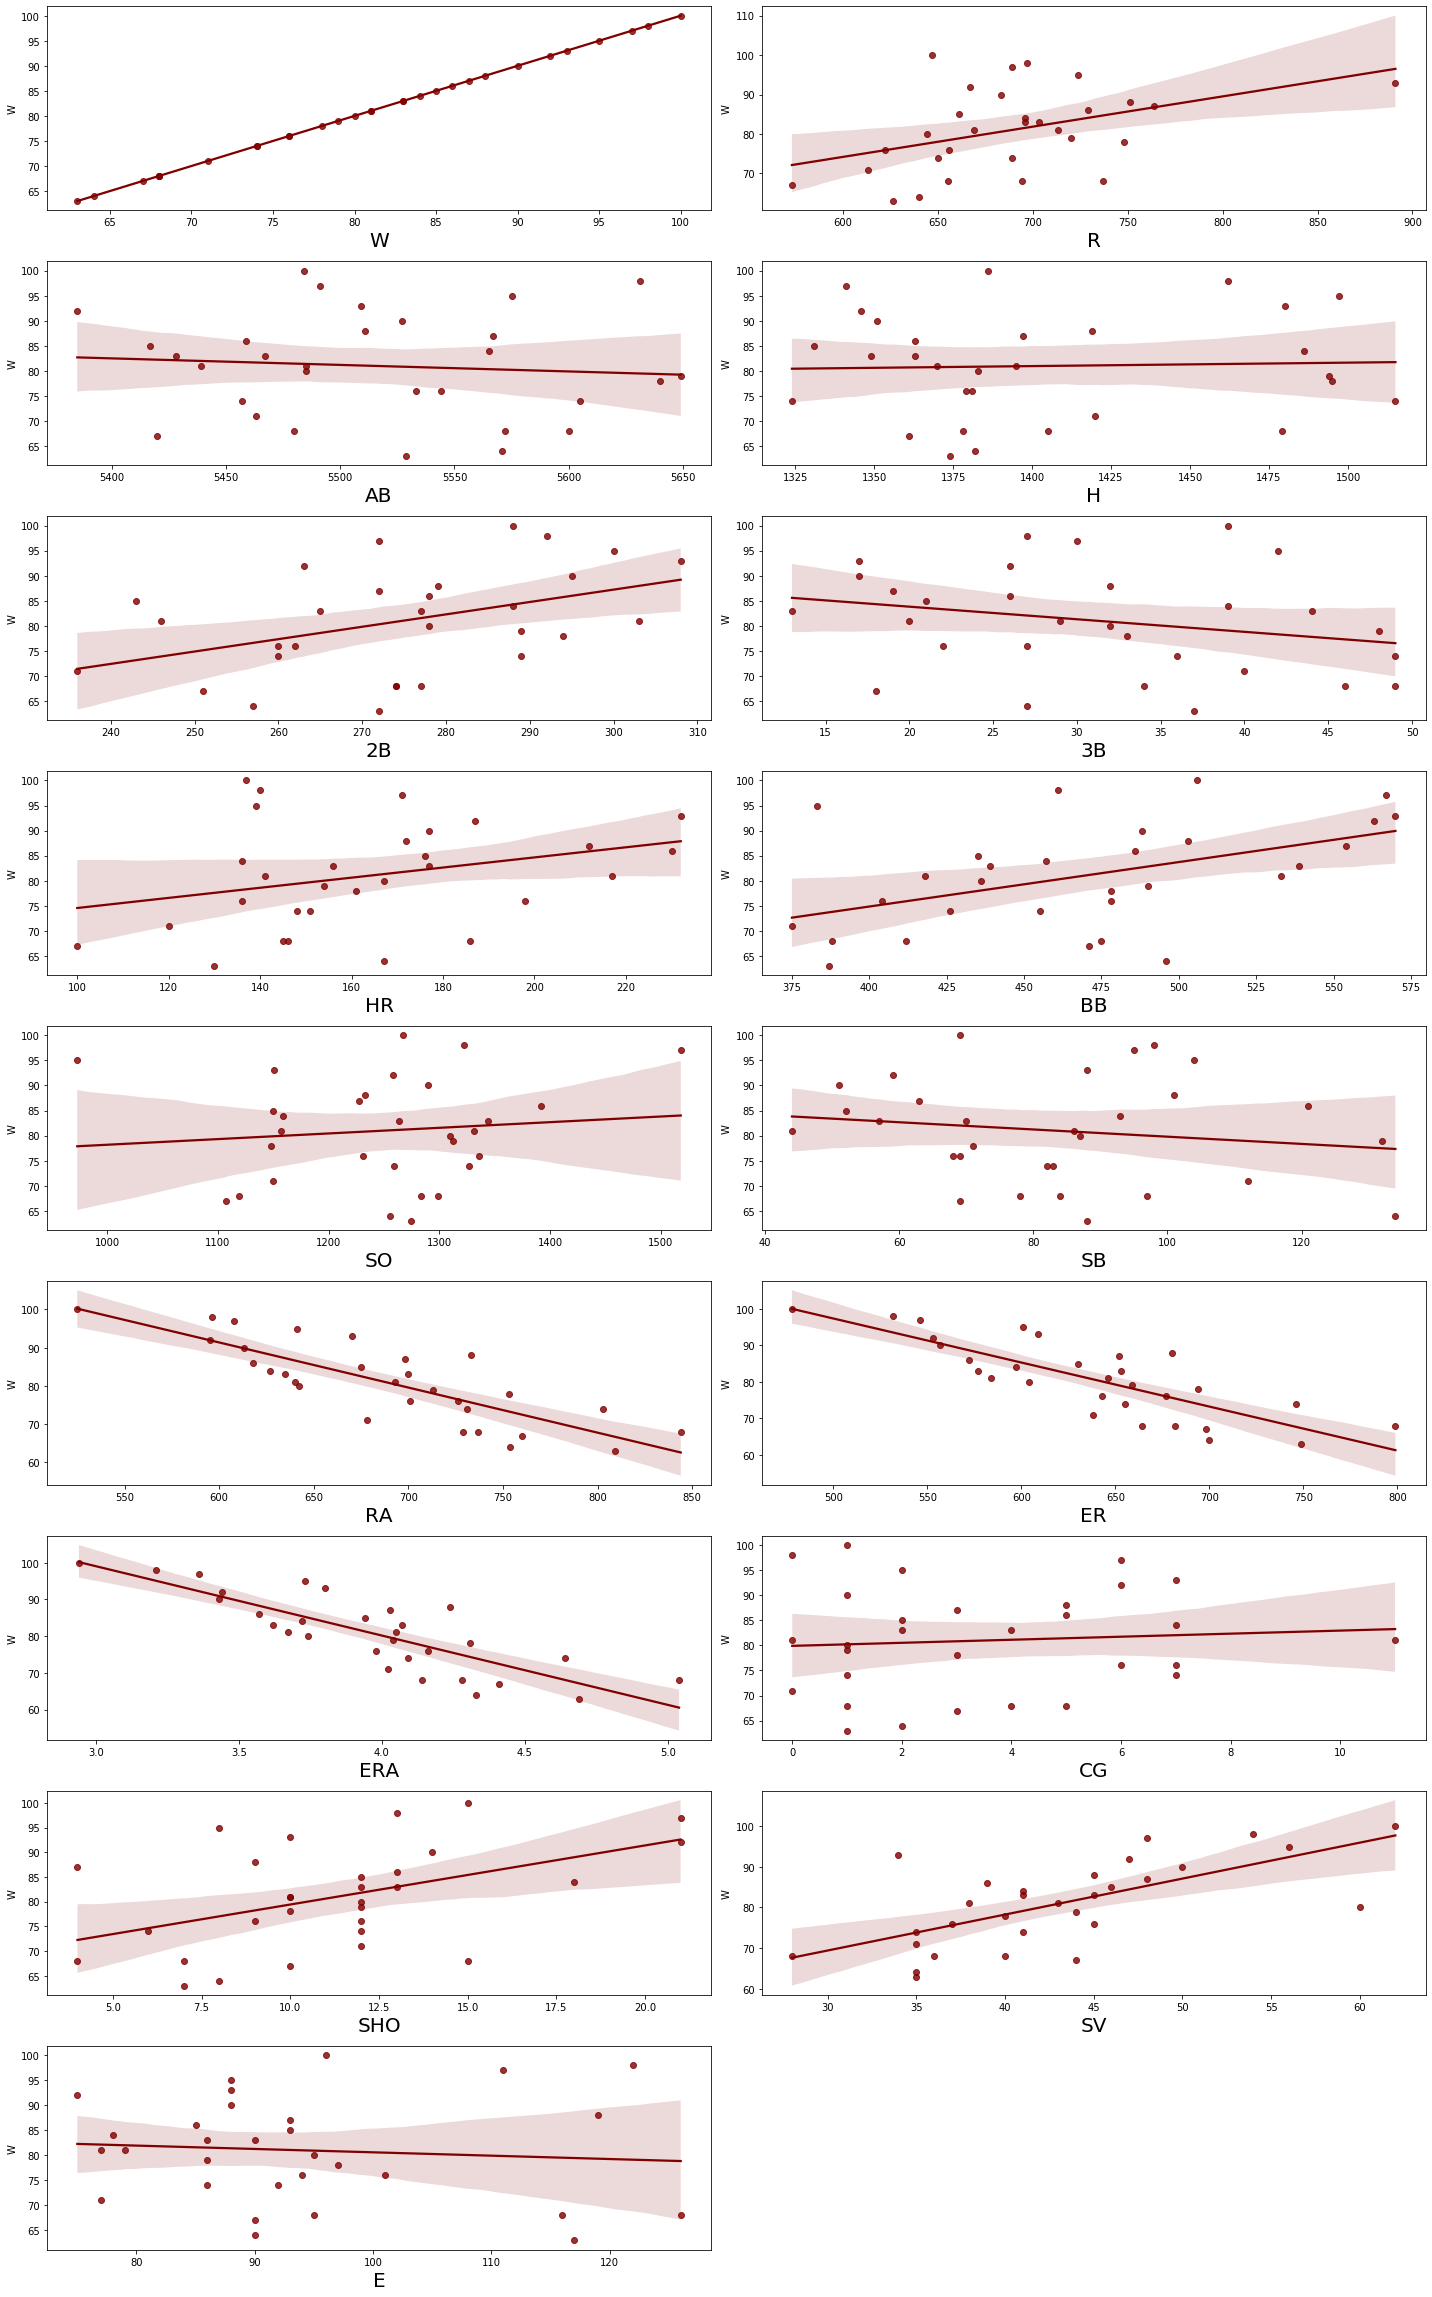

In [25]:
# Viewing the data through Regression plot
plt.figure(figsize=(20,35))
plotnumber=1

for column in df:
    if plotnumber<=17:
        ax=plt.subplot(10,2,plotnumber)
        sns.regplot(df[column],df['W'],color='maroon')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
    
plt.tight_layout()
plt.show()

Viewing each columns data with the Wining rate

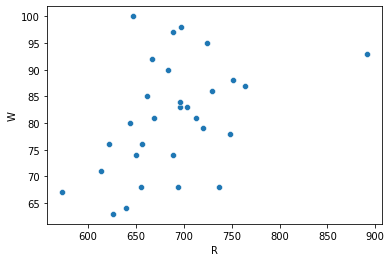

In [26]:
sns.scatterplot(df['R'],df['W'])

In Run 650 the wining score is 100, highest of all

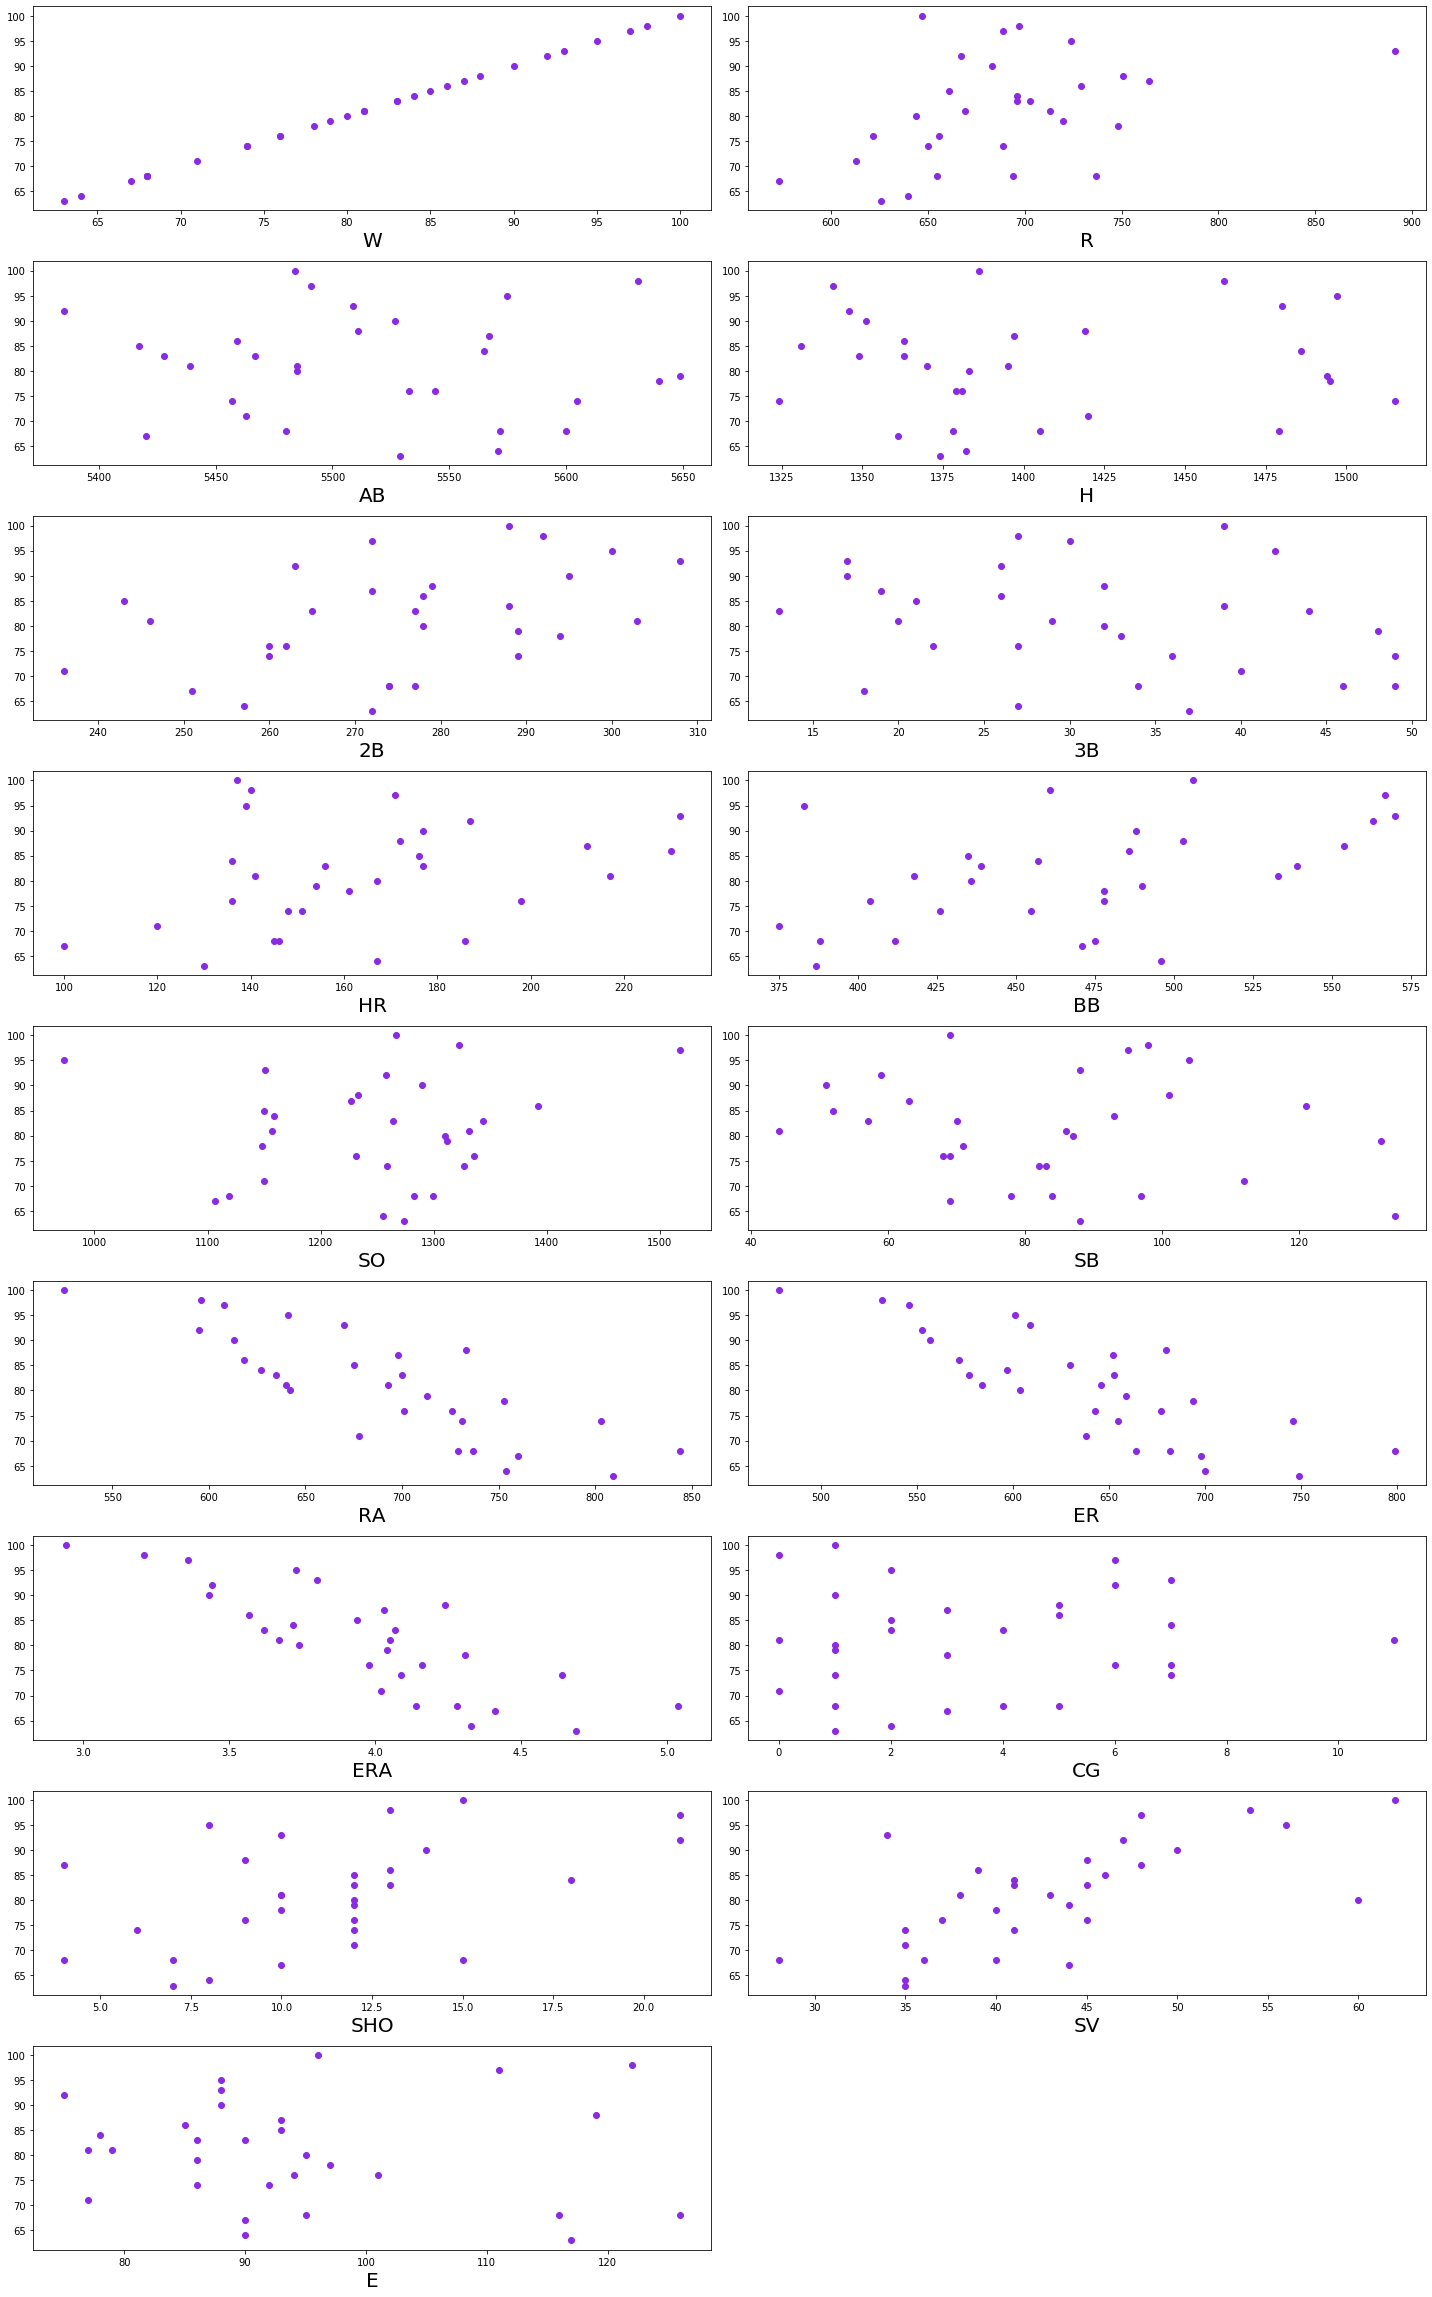

In [27]:
# Viewing the data through Scatter plot
plt.figure(figsize=(20,35))
plotnumber=1

for column in df:
    if plotnumber<=17:
        ax=plt.subplot(10,2,plotnumber)
        plt.scatter(df[column],df['W'],color='blueviolet')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
    
plt.tight_layout()
plt.show()

Viewing the each columns with the Wining rate to see how the data is scatter

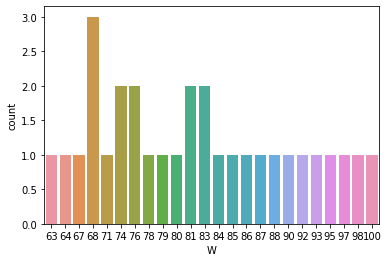

In [28]:
sns.countplot(df['W'])

There is a high win rate in 68

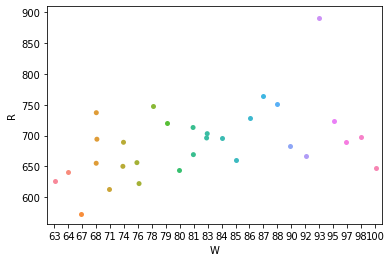

In [29]:
sns.stripplot(x='W',y='R',data=df)

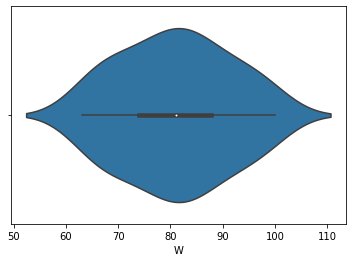

In [30]:
sns.violinplot(x='W',data=df)

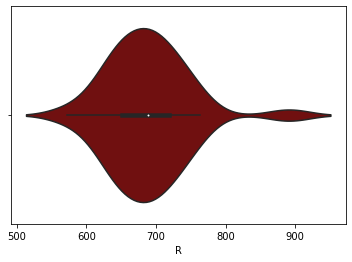

In [31]:
sns.violinplot(x='R',data=df,color='maroon')

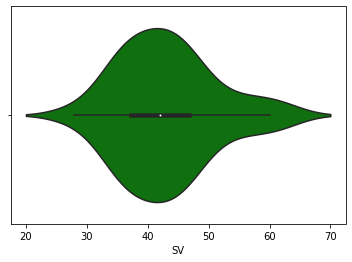

In [32]:
sns.violinplot(x='SV',data=df,color='green')

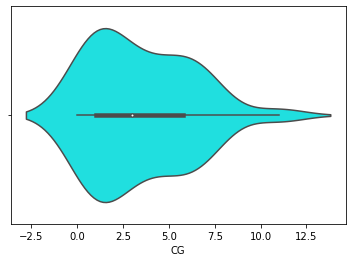

In [33]:
sns.violinplot(x='CG',data=df,color='AQUA')

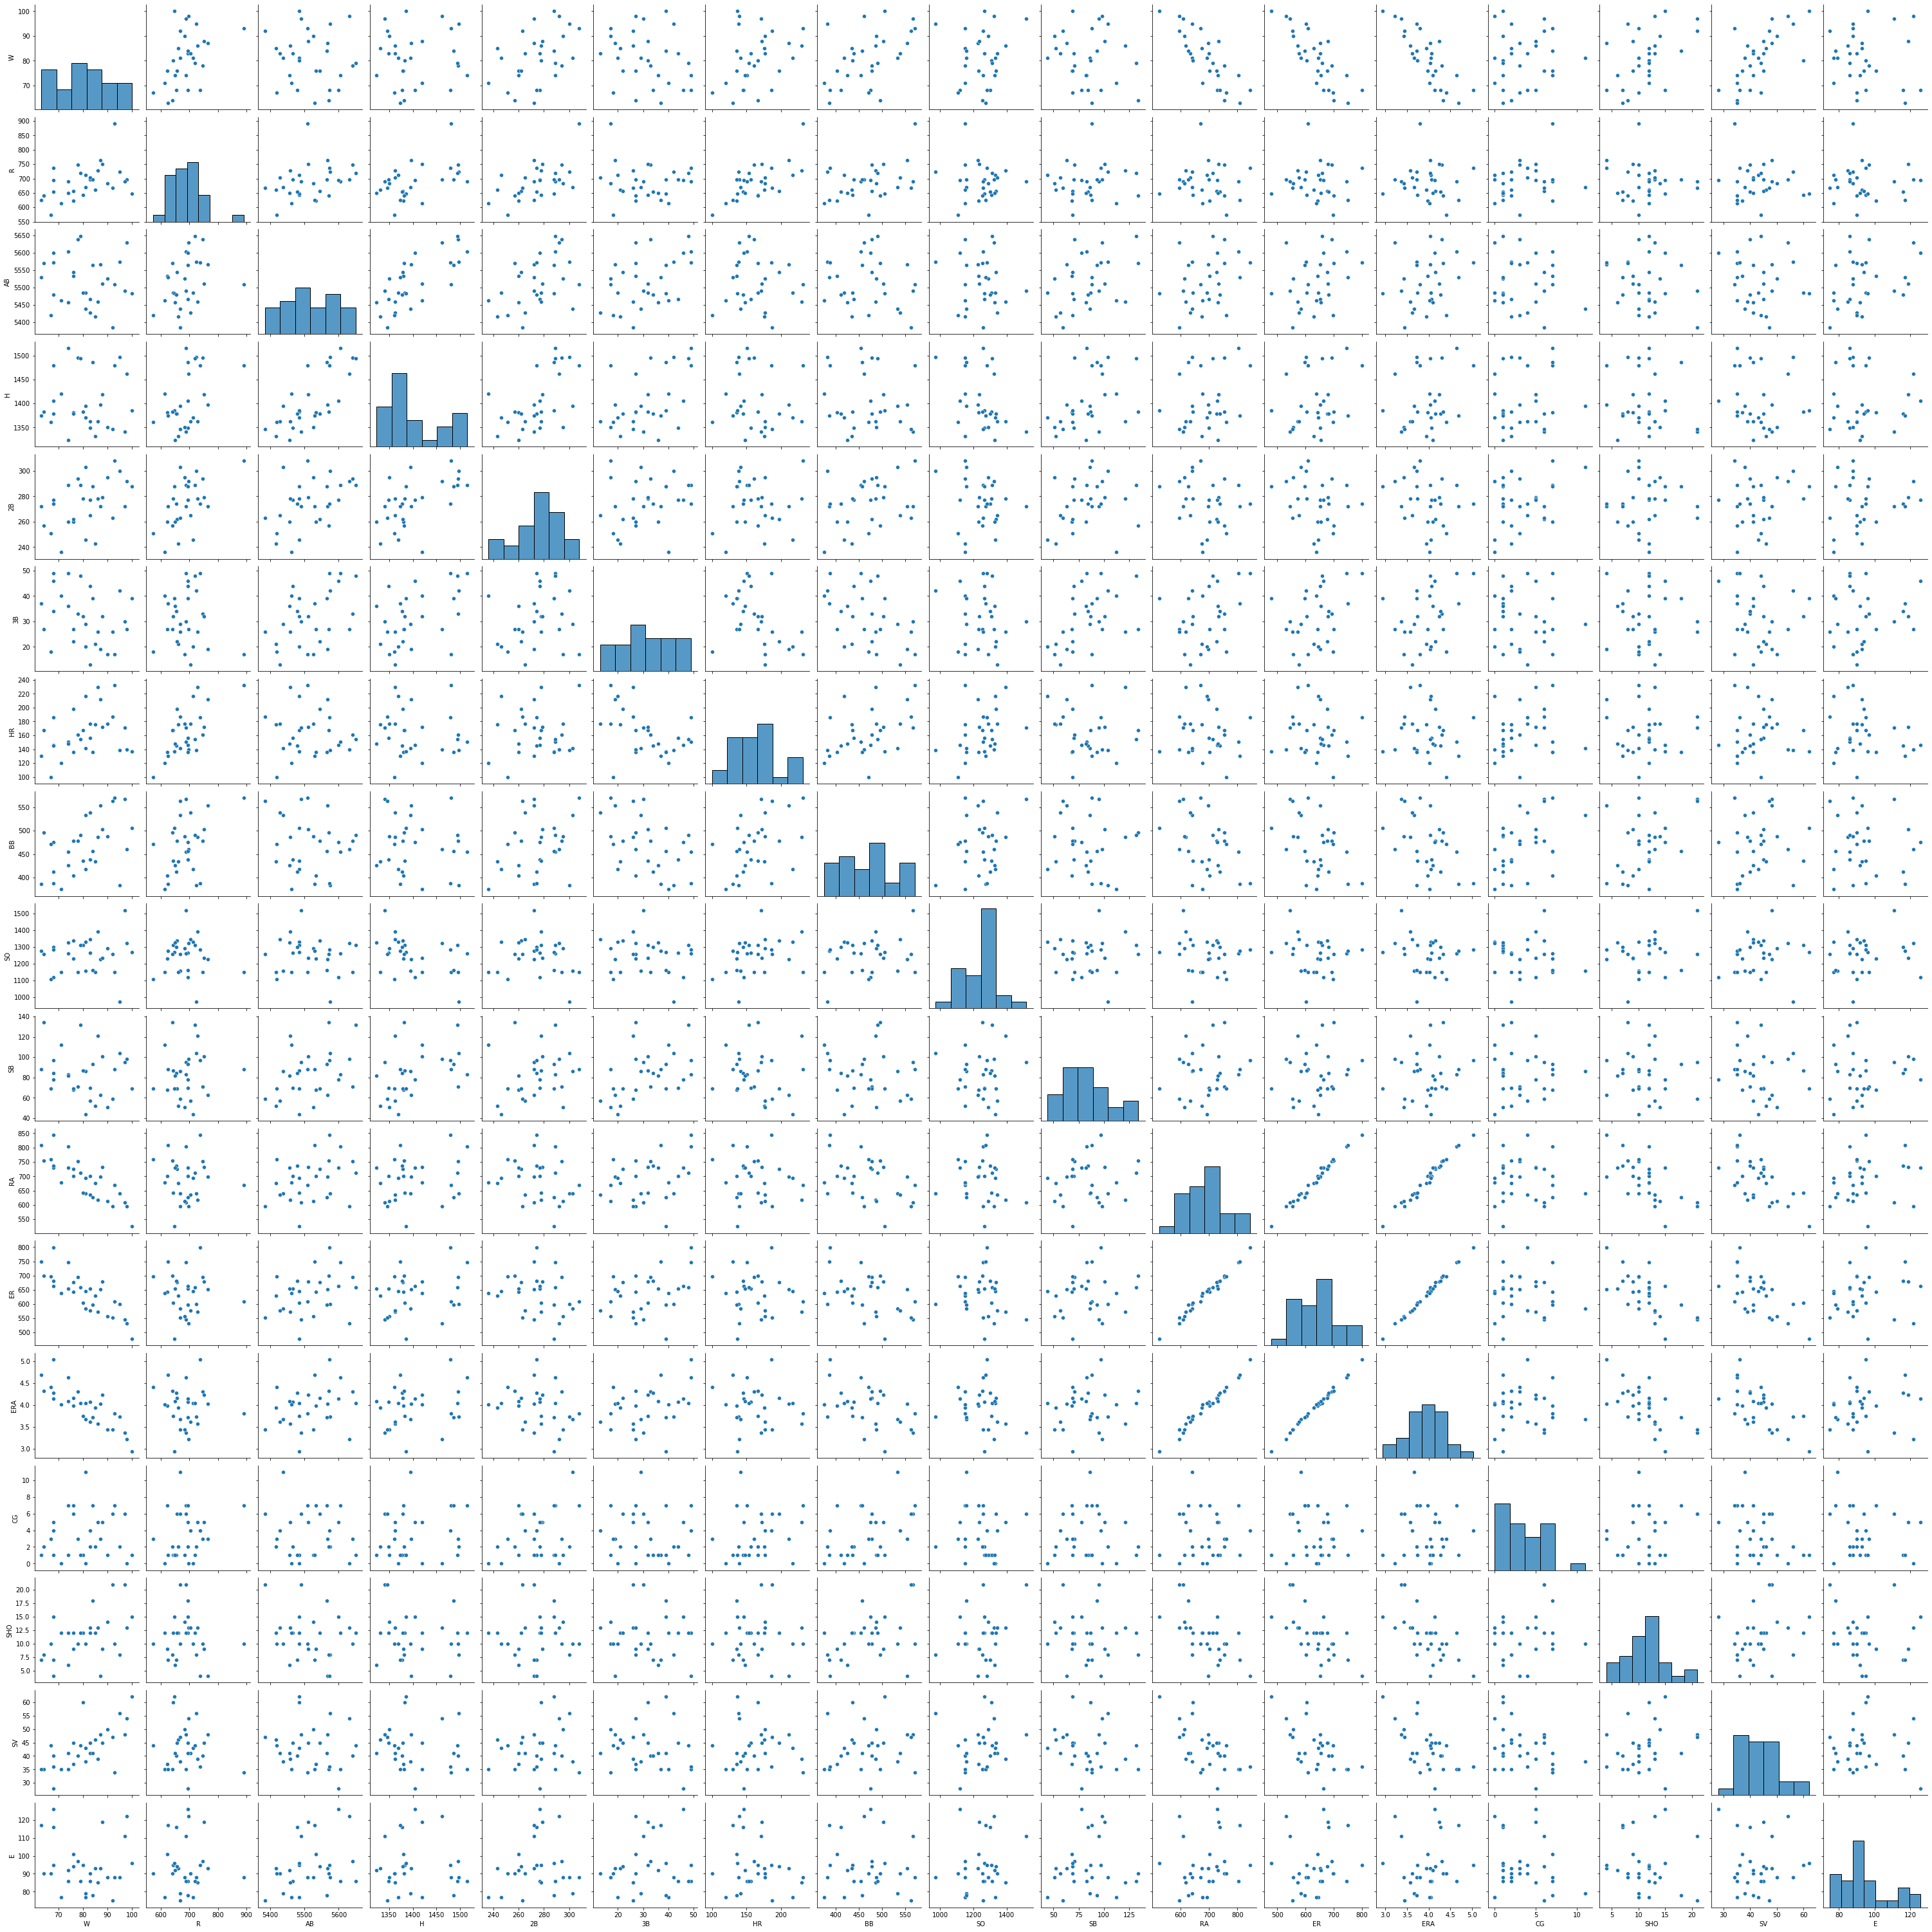

In [34]:
# Viewing the data through Pair plot
sns.pairplot(df)

<Figure size 1440x1800 with 0 Axes>

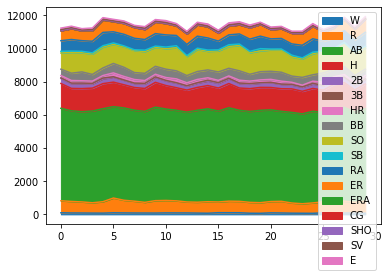

In [35]:
# Viewing the data through Area Plot
plt.figure(figsize=(20,25))
df.plot.area()

ERA Capture more area when compare to others.

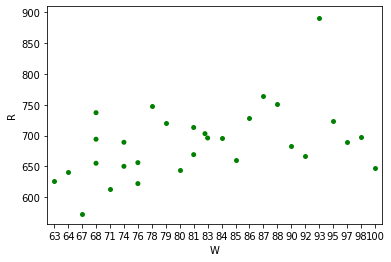

In [36]:
# Viewing the data between Wins and Runs through Swarmplot
sns.swarmplot(x='W',y='R',data=df,color='green')

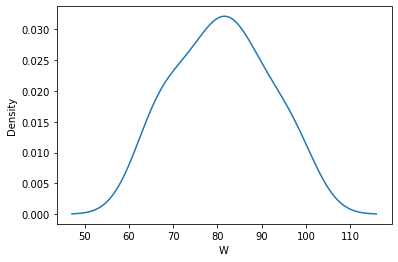

In [37]:
sns.kdeplot(df['W'])

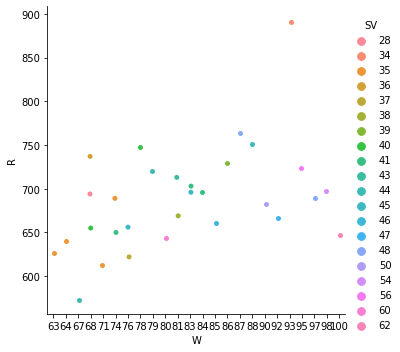

In [38]:
sns.catplot(x='W',y='R',hue='SV',data=df)

W         AxesSubplot(0.125,0.816017;0.352273x0.0639831)
R      AxesSubplot(0.547727,0.816017;0.352273x0.0639831)
AB        AxesSubplot(0.125,0.739237;0.352273x0.0639831)
H      AxesSubplot(0.547727,0.739237;0.352273x0.0639831)
2B        AxesSubplot(0.125,0.662458;0.352273x0.0639831)
3B     AxesSubplot(0.547727,0.662458;0.352273x0.0639831)
HR        AxesSubplot(0.125,0.585678;0.352273x0.0639831)
BB     AxesSubplot(0.547727,0.585678;0.352273x0.0639831)
SO        AxesSubplot(0.125,0.508898;0.352273x0.0639831)
SB     AxesSubplot(0.547727,0.508898;0.352273x0.0639831)
RA        AxesSubplot(0.125,0.432119;0.352273x0.0639831)
ER     AxesSubplot(0.547727,0.432119;0.352273x0.0639831)
ERA       AxesSubplot(0.125,0.355339;0.352273x0.0639831)
CG     AxesSubplot(0.547727,0.355339;0.352273x0.0639831)
SHO       AxesSubplot(0.125,0.278559;0.352273x0.0639831)
SV     AxesSubplot(0.547727,0.278559;0.352273x0.0639831)
E          AxesSubplot(0.125,0.20178;0.352273x0.0639831)
dtype: object

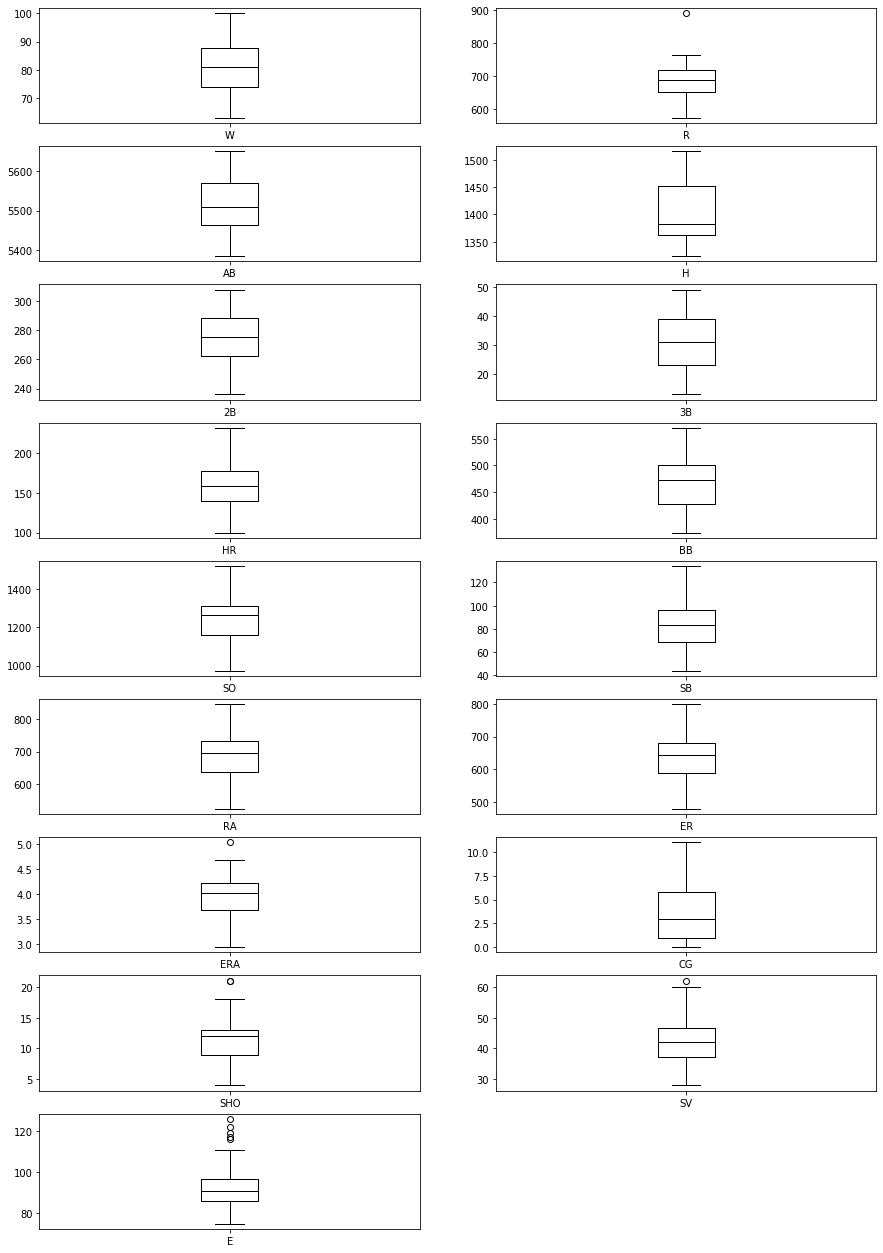

In [39]:
#Checking the Outlier through box plot
df.plot(kind='box',subplots=True,layout=(10,2),figsize=(15,25),color='black')

Outliers is present in R, ERA, SHO, SV, E. Lets remove the Outliers

### Removing Outliers

In [40]:
from scipy.stats import zscore

In [41]:
#Checking the ZScore
z=np.abs(zscore(df))
z

array([[1.36540860e+00, 6.19077968e-01, 8.47731264e-01, 1.66368512e+00,
        1.42017307e+00, 1.04119304e+00, 7.87298598e-01, 1.53490242e+00,
        2.69762957e+00, 9.13883291e-01, 6.66233927e-01, 5.05110079e-01,
        5.06955186e-01, 5.39806195e-01, 8.14628593e-01, 1.67160651e+00,
        4.61469635e-01],
       [1.97838300e-01, 1.34431656e-01, 7.11093535e-01, 9.70680764e-01,
        1.27403389e-01, 1.23580856e+00, 2.43966683e-01, 5.36591904e-01,
        1.54878442e-01, 6.01825582e-01, 1.65970766e-01, 2.48929848e-01,
        2.54597523e-01, 5.39806195e-01, 1.72800005e-01, 2.49879323e-01,
        6.07196888e-01],
       [3.24325082e-03, 3.32905860e-01, 1.11523330e+00, 1.51891367e-01,
        1.58879521e+00, 2.23807850e-01, 7.23377196e-01, 1.13914361e+00,
        8.93981893e-01, 1.11449182e-01, 6.80339091e-01, 7.51623132e-01,
        6.41346840e-01, 2.77264091e+00, 3.20914294e-01, 6.54856158e-01,
        1.11724227e+00],
       [4.83244373e-01, 1.14641931e+00, 2.41521620e-01, 4.010

In [42]:
df_new=df[(z<3).all(axis=1)]
df_new

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
10,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


In [43]:
df_new.shape # After removing the outliers there are 29rows and 17 columns present in the new data

(29, 17)

In [44]:
df.shape # There are 30 rows and 17 columns present in the actual data

(30, 17)

In [45]:
# Let see how many data were removed in outliers

loss_data=(30-29)/30
loss_data*100

3.3333333333333335

3.33 % of data were removed in Outliers

# Skewness in Data

In [46]:
df_new.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

Skewness is present in H, CG, SHO, SV, E

# Removing Skewness

In [47]:
from sklearn.preprocessing import PowerTransformer

In [48]:
#Skewed data
skewed_data=["H","CG","SHO","SV","E"]

In [49]:
#Skewness remove in H using log1p
df_new["H"]=np.log1p(df_new["H"])

In [50]:
# Using the method 'yeo-johnson'
scaled = PowerTransformer(method='yeo-johnson')


In [51]:
#Removing skewness
df_new[['E','SHO','SV','CG']] = scaled.fit_transform(df_new[['E','SHO','SV','CG']].values)

In [52]:
df_new.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.738455
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG    -0.045947
SHO    0.000529
SV    -0.000925
E      0.065585
dtype: float64

Removed the skewness that present in the data

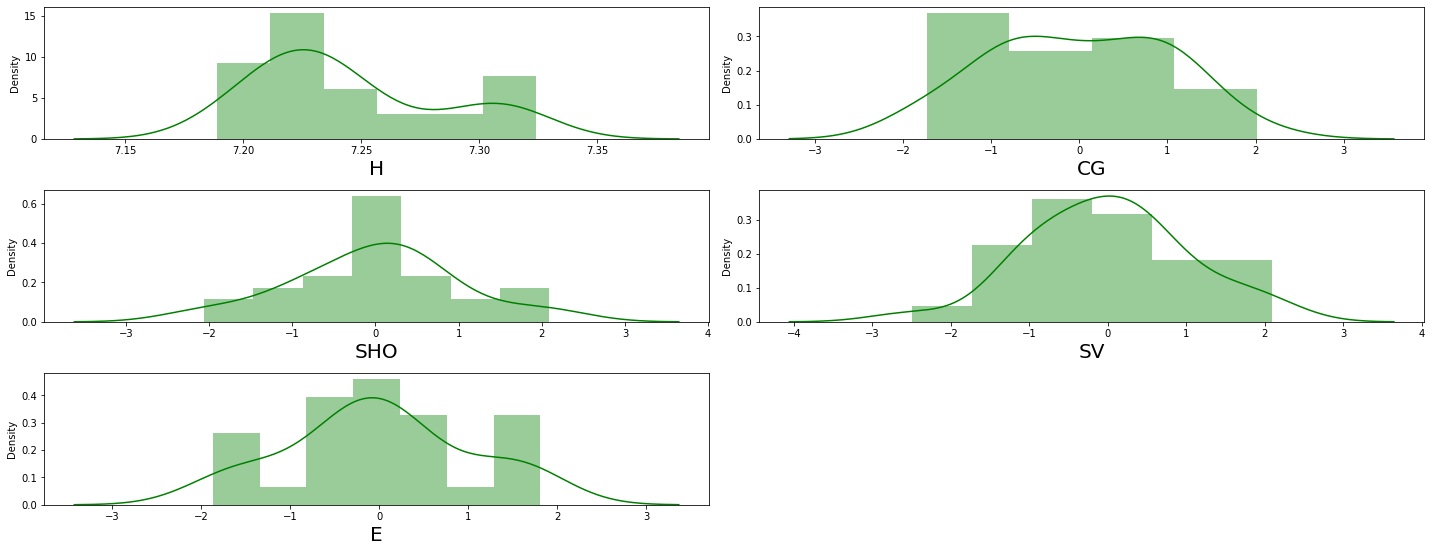

In [53]:
#Viewing the data after removal of skewness through Distribution Plot
plt.figure(figsize=(20,25))
plotnumber=1

for column in skewed_data:
    if plotnumber<=12:
        ax=plt.subplot(10,2,plotnumber)
        sns.distplot(df_new[column],color='green')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
    
plt.tight_layout()
plt.show()

In [54]:
df_new

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,7.311886,300,42,139,383,973,104,641,601,3.73,-0.307098,-0.787002,1.532753,-0.348265
1,83,696,5467,7.207860,277,44,156,439,1264,70,700,653,4.07,-0.307098,0.236737,0.312020,-0.540820
2,81,669,5439,7.241366,303,29,141,533,1157,86,640,584,3.67,2.011315,-0.252844,-0.664137,-1.326125
3,76,622,5533,7.231287,260,27,136,404,1231,68,701,643,3.98,1.264463,-0.513555,-0.820689,0.650818
4,74,689,5605,7.323831,289,49,151,455,1259,83,803,746,4.64,1.264463,0.236737,-1.149165,-0.540820
6,87,764,5567,7.242798,272,19,212,554,1227,63,698,652,4.03,0.121871,-2.064039,0.677176,0.082858
7,81,713,5485,7.223296,246,20,217,418,1331,44,693,646,4.05,-1.732896,-0.252844,0.052325,-1.588197
8,80,644,5485,7.232733,278,32,167,436,1310,87,642,604,3.74,-0.870682,0.236737,1.908137,0.237592
9,78,748,5640,7.310550,294,33,161,478,1148,71,753,694,4.31,0.121871,-0.252844,-0.365006,0.383386
10,88,751,5511,7.258412,279,32,172,503,1233,101,733,680,4.24,0.770649,-0.513555,0.312020,1.554265


### Splitting the data into X and Y Variable

In [55]:
x=df_new.drop('W',axis=1)
x.shape

(29, 16)

In [56]:
y=df_new['W']
y.shape

(29,)

### Scaling the data

In [57]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
print(x_scaled)

[[ 9.59398345e-01  8.30084222e-01  1.72372599e+00  1.55653766e+00
   1.01084549e+00 -7.65863143e-01 -1.53635899e+00 -2.72762331e+00
   9.05952902e-01 -6.64513529e-01 -5.11148124e-01 -5.11388277e-01
  -3.07098204e-01 -7.87002186e-01  1.53275292e+00 -3.48265262e-01]
 [ 3.31147171e-01 -7.02830744e-01 -9.49845892e-01  2.01171316e-01
   1.20891656e+00 -1.81388639e-01 -4.95020511e-01  1.21895521e-01
  -5.85315147e-01  1.54638235e-01  2.32160816e-01  2.38952260e-01
  -3.07098204e-01  2.36736538e-01  3.12020186e-01 -5.40819806e-01]
 [-2.74666462e-01 -1.10025314e+00 -8.87001319e-02  1.73332457e+00
  -2.76616501e-01 -6.97101437e-01  1.25294051e+00 -9.25865699e-01
   1.16458052e-01 -6.78397458e-01 -7.54152970e-01 -6.43801313e-01
   2.01131531e+00 -2.52844176e-01 -6.64136739e-01 -1.32612477e+00]
 [-1.32923093e+00  2.33950624e-01 -3.47746920e-01 -8.00621197e-01
  -4.74687576e-01 -8.69005703e-01 -1.14585706e+00 -2.01245790e-01
  -6.73036797e-01  1.68522163e-01  8.92167892e-02  4.03327064e-02
   1.26

# Variance Inflation Factor

In [58]:
vif=pd.DataFrame()
vif['Features']=x.columns
vif['VIF']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif

,Features,VIF
0,R,7.112342
1,AB,20.237195
2,H,10.114607
3,2B,3.528059
4,3B,3.227808
5,HR,8.736960
6,BB,3.324550
7,SO,2.811546
8,SB,1.955254
9,RA,200.826177


Variance inflation factor is high in RA, ER, ERA

So, there is a mulitcollinearity exist in this 3 columns RA, ER, ERA. We can remove this 3 columns to avoid Multicollinearity

In [59]:
X=x.drop(columns=['RA','ER','ERA']) #Droping the column that contains the Multicollinearlity
X

,R,AB,H,2B,3B,HR,BB,SO,SB,CG,SHO,SV,E
0,724,5575,7.311886,300,42,139,383,973,104,-0.307098,-0.787002,1.532753,-0.348265
1,696,5467,7.207860,277,44,156,439,1264,70,-0.307098,0.236737,0.312020,-0.540820
2,669,5439,7.241366,303,29,141,533,1157,86,2.011315,-0.252844,-0.664137,-1.326125
3,622,5533,7.231287,260,27,136,404,1231,68,1.264463,-0.513555,-0.820689,0.650818
4,689,5605,7.323831,289,49,151,455,1259,83,1.264463,0.236737,-1.149165,-0.540820
6,764,5567,7.242798,272,19,212,554,1227,63,0.121871,-2.064039,0.677176,0.082858
7,713,5485,7.223296,246,20,217,418,1331,44,-1.732896,-0.252844,0.052325,-1.588197
8,644,5485,7.232733,278,32,167,436,1310,87,-0.870682,0.236737,1.908137,0.237592
9,748,5640,7.310550,294,33,161,478,1148,71,0.121871,-0.252844,-0.365006,0.383386
10,751,5511,7.258412,279,32,172,503,1233,101,0.770649,-0.513555,0.312020,1.554265


In [60]:
X.shape  #Checking the shape of x after droping the columns

(29, 13)

In [61]:
# Scaling the data after removing the multicollinearity
scaler=StandardScaler()           
X_scaled=scaler.fit_transform(X)
print(X_scaled)

[[ 9.59398345e-01  8.30084222e-01  1.72372599e+00  1.55653766e+00
   1.01084549e+00 -7.65863143e-01 -1.53635899e+00 -2.72762331e+00
   9.05952902e-01 -3.07098204e-01 -7.87002186e-01  1.53275292e+00
  -3.48265262e-01]
 [ 3.31147171e-01 -7.02830744e-01 -9.49845892e-01  2.01171316e-01
   1.20891656e+00 -1.81388639e-01 -4.95020511e-01  1.21895521e-01
  -5.85315147e-01 -3.07098204e-01  2.36736538e-01  3.12020186e-01
  -5.40819806e-01]
 [-2.74666462e-01 -1.10025314e+00 -8.87001319e-02  1.73332457e+00
  -2.76616501e-01 -6.97101437e-01  1.25294051e+00 -9.25865699e-01
   1.16458052e-01  2.01131531e+00 -2.52844176e-01 -6.64136739e-01
  -1.32612477e+00]
 [-1.32923093e+00  2.33950624e-01 -3.47746920e-01 -8.00621197e-01
  -4.74687576e-01 -8.69005703e-01 -1.14585706e+00 -2.01245790e-01
  -6.73036797e-01  1.26446344e+00 -5.13554932e-01 -8.20688859e-01
   6.50818351e-01]
 [ 1.74084377e-01  1.25589393e+00  2.03070817e+00  9.08318973e-01
   1.70409425e+00 -3.53292905e-01 -1.97495230e-01  7.29347159e-02


In [62]:
# Viewing the Variance Inflation Factor
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif

,Features,VIF
0,R,5.807810
1,AB,5.137310
2,H,7.357714
3,2B,2.796654
4,3B,2.698782
5,HR,6.129727
6,BB,3.045970
7,SO,2.227061
8,SB,1.606165
9,CG,2.429044


We can see that there is no high Variance Inflation factor exist in data, this means no mulitcollinearilty exist, Our data is good to proceed for training and testing

# Principle Component Analysis

In [134]:
from sklearn.decomposition import PCA

pca=PCA(n_components=None)
pca.fit(x_scaled)

PCA()

In [135]:
pca.transform(x_scaled)

array([[ 1.06112592e+00, -2.94223128e+00,  2.31589241e+00,
        -5.42698358e-01, -2.34657733e+00, -4.08368959e-01,
         8.90178042e-01,  5.02022631e-01,  6.94227337e-01,
        -5.23988956e-01,  5.97217952e-01,  2.76243577e-01,
        -5.64272254e-02,  1.60351948e-01, -6.98922250e-02,
         1.12235582e-02],
       [ 1.40298497e-02,  4.37703089e-01,  3.22933400e-01,
        -2.47893716e-02, -3.04057982e-01,  3.77976016e-01,
        -8.41963851e-01,  1.46827415e+00,  7.17351725e-02,
        -1.19381190e-01, -7.08072194e-01,  3.19413895e-01,
        -9.11024884e-02,  5.35569640e-01,  5.32855907e-02,
        -2.82423973e-02],
       [-1.21084686e+00, -8.18168191e-01,  1.45916067e-01,
         2.75764118e+00, -5.60768502e-01, -6.48513863e-01,
         1.47475101e+00,  8.88993773e-01,  5.80493469e-02,
         1.22753435e+00, -2.24664028e-01, -8.27412367e-02,
         8.59518594e-02, -1.29840767e-01, -1.94392467e-02,
        -6.23234761e-03],
       [ 7.05214346e-01,  1.44721898e

# Splitting the data into training and Testing

In [63]:
#Training data=75%
#Testing data=25%

x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=22,random_state=99)

In [64]:
x_train.shape

(7, 16)

In [65]:
x_test.shape

(22, 16)

In [66]:
y_train.shape

(7,)

In [67]:
y_test.shape

(22,)

# Building a Model

In [143]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge, LassoCV, RidgeCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.linear_model import SGDRegressor
from xgboost import XGBRegressor


# Linear Regression

In [69]:
# Training the model
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [70]:
# Predicting the value for training Data
lr_pred=lr.predict(x_train)
print("Predicted Value:\n","\n",lr_pred)

Predicted Value:
 
 [64. 79. 88. 78. 84. 76. 83.]


In [71]:
# Predicting the value for Test Data
lr_pred=lr.predict(x_test)
print("Predicted Value:\n","\n",lr_pred)

Predicted Value:
 
 [67.82796173 68.53063168 97.80651053 77.48145712 85.08529314 87.08934173
 86.9189232  90.850508   83.90997751 86.61260438 64.79984951 97.4283076
 71.27228144 78.33561526 77.74880774 86.75056087 84.45158488 77.90144606
 75.03555405 72.47127107 80.22484552 74.40037294]


In [72]:
#Checking the coefficient
lr.coef_

array([ 2.68911608, -2.22279965,  0.48474034,  1.14077921,  1.65790055,
       -0.39493553, -0.19664725,  1.22227684, -0.34321939, -1.54025519,
       -1.45644257, -1.36196389,  2.19520761,  0.89911475,  2.90692992,
        2.6978243 ])

In [73]:
#Checking the Intercept
lr.intercept_

80.17012779217727

In [74]:
#Checking the score for training data
lr.score(x_train,y_train)

1.0

In [75]:
#Checking the score for testing data
lr.score(x_test,y_test)

0.7306804175059667

In [76]:
#Checking the R2 Score
print("R2 Score:",{r2_score(y_test,lr_pred)})

R2 Score: {0.7306804175059667}


In Linear Regreesion the R2 Score is 73%

In [77]:
#Checking the Mean Squared error and Mean Absolute Error
from sklearn.metrics import mean_absolute_error
print("Mean Squared Error:",mean_squared_error(y_test,lr_pred))
print("Mean Absolute Error:",mean_absolute_error(y_test,lr_pred))

Mean Squared Error: 32.26715692079338
Mean Absolute Error: 4.751268924570108


# Using Lasso Model

In [78]:
param={'alpha':[0.0001,0.1,1.0,10,0.001],'random_state':range(1,50)}

In [79]:
ls=Lasso(alpha=1,random_state=0)
ls.fit(x_train,y_train)

Lasso(alpha=1, random_state=0)

In [80]:
ls_pred=ls.predict(x_test)
print("Predicted Value:\n","\n",ls_pred)

Predicted Value:
 
 [77.9583853  68.71413608 86.25167384 83.40336668 80.89335584 85.88395662
 78.62738822 84.56910644 79.20352342 88.45040691 66.01086961 90.29149703
 78.68578588 82.11459338 66.56329649 89.22213287 84.68623694 74.63318018
 75.36618843 75.69403517 87.14950234 75.49928545]


In [81]:
print("Lasso Coefficient:\n","\n",ls.coef_,"\n")
print("Lasso Intercept:\n","\n",ls.intercept_)

Lasso Coefficient:
 
 [ 1.45773892 -0.          0.          0.          0.         -0.
 -0.         -0.         -0.68765145 -0.         -0.         -0.
  2.04444406  0.15894719  6.18480406  0.        ] 

Lasso Intercept:
 
 79.71972079652276


In [82]:
ls.score(x_test,y_test)

0.6289029508243575

In [83]:
print("Mean Squared Error:",mean_squared_error(y_test,ls_pred))
print("Mean Absolute Error:",mean_absolute_error(y_test,ls_pred))
print("Lasso R2 Score:",{r2_score(y_test,ls_pred)})

Mean Squared Error: 44.461106792556095
Mean Absolute Error: 5.630230452746869
Lasso R2 Score: {0.6289029508243575}


In Lasso R2 Score is 63%

# Ridge Regressor

In [84]:
rg=Ridge(alpha=0.001,random_state=5)
rg.fit(x_train,y_train)

Ridge(alpha=0.001, random_state=5)

In [85]:
rg_pred=rg.predict(x_test)
print("Ridge Predicted Value:\n",rg_pred)

Ridge Predicted Value:
 [67.83049968 68.53137216 97.80112766 77.48169391 85.08502455 87.09004145
 86.9173671  90.84608761 83.91037474 86.61035668 64.80228674 97.42406034
 71.27579521 78.33693324 77.74914146 86.74961348 84.45177697 77.90049985
 75.03563759 72.47238672 80.22598425 74.40173146]


In [86]:
print("Ridge Coefficient:\n","\n",rg.coef_,"\n")
print("Ridge Intercept:",rg.intercept_,"\n")
print("Ridge Score value is:",rg.score(x_train,y_train))

Ridge Coefficient:
 
 [ 2.68893978 -2.22257557  0.48451164  1.1408119   1.65749912 -0.39462451
 -0.1964082   1.22150559 -0.3436185  -1.53988822 -1.45600961 -1.36149914
  2.19461631  0.89918991  2.90626867  2.69674158] 

Ridge Intercept: 80.16999285592715 

Ridge Score value is: 0.9999999703366897


In [87]:
print("Mean Squared Error:",mean_squared_error(y_test,rg_pred))
print("Mean Absolute Error:",mean_absolute_error(y_test,rg_pred))
print("Ridge R2 Score:",{r2_score(y_test,rg_pred)})

Mean Squared Error: 32.26407650292443
Mean Absolute Error: 4.751119739879347
Ridge R2 Score: {0.730706128381468}


In Ridge Regressor R2 Score value is 73%

# Decision Tree Regressor

In [88]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [89]:
dtr.score(x_train,y_train)

1.0

In [90]:
dtr_pred=dtr.predict(x_test)
print("Predicted Value:\n",dtr_pred)

Predicted Value:
 [64. 76. 79. 79. 79. 83. 78. 79. 78. 79. 64. 83. 64. 64. 76. 84. 79. 76.
 79. 78. 83. 78.]


In [91]:
print("Mean Squared Error:",mean_squared_error(y_test,dtr_pred))
print("Mean Absolute Error:",mean_absolute_error(y_test,dtr_pred))
print("Decision Tree Regressor R2 Score:",{r2_score(y_test,dtr_pred)})

Mean Squared Error: 119.9090909090909
Mean Absolute Error: 9.272727272727273
Decision Tree Regressor R2 Score: {-0.0008277574670625398}


# KNeighborsRegressor

In [92]:

knr=KNeighborsRegressor()
knr.fit(x_train,y_train)

KNeighborsRegressor()

In [93]:
knr.score(x_train,y_train)

0.06371497197758214

In [94]:
knr_pred=knr.predict(x_test)
print("KNeighbors Regressor Predict Value is:\n",knr_pred)

KNeighbors Regressor Predict Value is:
 [79.  77.8 82.  77.8 79.  79.  79.6 82.4 81.8 82.  77.2 82.  77.8 79.
 81.8 82.4 81.8 77.8 77.8 78.4 77.8 82.4]


In [95]:
print("Mean Squared Error:",mean_squared_error(y_test,knr_pred))
print("Mean Absolute Error:",mean_absolute_error(y_test,knr_pred))
print("KNeighbors Regressor R2 Score:",{r2_score(y_test,knr_pred)})

Mean Squared Error: 102.9181818181818
Mean Absolute Error: 8.863636363636365
KNeighbors Regressor R2 Score: {0.14098779057736066}


# RandomForestRegressor

In [96]:
rfr=RandomForestRegressor(n_estimators=100,random_state=42)
rfr.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [97]:
rfr.score(x_train,y_train)

0.8265513210568454

In [98]:
rfr_pred=rfr.predict(x_test)
print("Predicted Value:\n",rfr_pred)

Predicted Value:
 [74.64 73.37 82.05 79.83 79.64 80.51 79.35 81.15 80.89 80.91 78.59 81.21
 78.73 79.24 80.08 80.12 80.08 78.53 78.19 73.73 80.05 74.55]


In [99]:
print("Mean Squared Error:",mean_squared_error(y_test,rfr_pred))
print("Mean Absolute Error:",mean_absolute_error(y_test,rfr_pred))
print("Random Forest Regressor R2 Score:",{r2_score(y_test,rfr_pred)})

Mean Squared Error: 90.95443636363638
Mean Absolute Error: 7.972727272727272
Random Forest Regressor R2 Score: {0.24084384355383825}


# Support Vector Regressor

In [100]:
svr_li=SVR(kernel='linear')
svr_li.fit(x_train,y_train)

SVR(kernel='linear')

In [101]:
svr_li.score(x_train,y_train)

0.867733440172923

In [104]:
svr_li_pred=svr_li.predict(x_test)
print("Predicted Value:\n",svr_li_pred)

Predicted Value:
 [72.2016226  70.67849419 89.76925068 77.35853131 83.27051604 87.2190315
 84.251182   84.88038521 83.53813244 83.81048468 71.75307575 91.54930032
 76.04550501 79.41742499 77.48717507 84.53938824 83.82671599 76.7925688
 76.2033218  73.32956482 79.05804369 76.1770576 ]


In [105]:
svr_py=SVR(kernel='poly')
svr_py.fit(x_train,y_train)

SVR(kernel='poly')

In [106]:
svr_py.score(x_train,y_train)

0.20808763409177966

In [111]:
svr_py_pred=svr_py.predict(x_test)
print("Predicted Value:\n",svr_py_pred)

Predicted Value:
 [79.45504378 78.86715936 80.22444911 79.71540877 80.01322705 80.72967868
 79.96453656 79.81159065 80.10270315 79.87500539 79.31152671 81.1204047
 79.50308104 80.05309825 79.50045094 80.07971143 80.08314712 79.43948478
 79.47625211 78.55004709 79.68647442 78.7983077 ]


In [112]:
svr_rbf=SVR(kernel='rbf')
svr_rbf.fit(x_train,y_train)

SVR()

In [113]:
svr_rbf.score(x_train,y_train)

0.16230152600602388

In [115]:
svr_rbf_pred=svr_rbf.predict(x_test)
print("Predicted Value:\n",svr_rbf_pred)

Predicted Value:
 [78.73978809 78.69535602 79.03665519 78.87705308 79.07396359 79.07180344
 79.10133692 79.01485478 79.22888324 79.30055075 78.89708312 79.06114533
 79.03721848 78.98729455 78.85755751 79.07449547 79.12948909 78.89578306
 78.98660766 78.88371435 79.05271786 78.80394076]


In Support Vector Regressor kernel='linear' gives a good score 86% as compare with other kernel

# XGBRegressor

In [116]:
#Training the data
from xgboost import XGBRegressor

xgb=XGBRegressor()
xgb.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [117]:
print("XGB Score is:",xgb.score(x_train,y_train))

XGB Score is: 0.9999999927292853


In [118]:
xgb_pred=xgb.predict(x_test)
print("Predicted Value:\n",xgb_pred)

Predicted Value:
 [66.24285  76.00054  83.874855 78.28852  83.874855 82.008385 81.83196
 80.1085   81.95641  79.33022  64.31548  79.33022  71.07259  69.28129
 77.90157  81.003365 83.87449  76.1811   78.22401  77.876045 87.99854
 77.77712 ]


In [119]:
print("Mean Squared Error:",mean_squared_error(y_test,xgb_pred))
print("Mean Absolute Error:",mean_absolute_error(y_test,xgb_pred))
print("XGB Regressor R2 Score:",{r2_score(y_test,xgb_pred)})

Mean Squared Error: 96.96039965269897
Mean Absolute Error: 7.900204745205966
XGB Regressor R2 Score: {0.19071474387965925}


### Ensemble Technique

# AdaBoostRegressor

In [120]:
from sklearn.ensemble import AdaBoostRegressor

adb=AdaBoostRegressor()
adb.fit(x_train,y_train)

AdaBoostRegressor()

In [121]:
print("AdaBoost Regressor Score:",adb.score(x_train,y_train))

AdaBoost Regressor Score: 0.9992994395516414


In [122]:
adb_pred=adb.predict(x_test)
print("Predicted values:\n",xgb_pred)

Predicted values:
 [66.24285  76.00054  83.874855 78.28852  83.874855 82.008385 81.83196
 80.1085   81.95641  79.33022  64.31548  79.33022  71.07259  69.28129
 77.90157  81.003365 83.87449  76.1811   78.22401  77.876045 87.99854
 77.77712 ]


In [123]:
print("Mean Squared Error:",mean_squared_error(y_test,adb_pred))
print("Mean Absolute Error:",mean_absolute_error(y_test,adb_pred))
print("Ada Boost Regressor R2 Score:",{r2_score(y_test,adb_pred)})

Mean Squared Error: 73.36363636363636
Mean Absolute Error: 6.818181818181818
Ada Boost Regressor R2 Score: {0.3876664137407737}


## Cross Validation

In [124]:
def model_cv(model,x,y):
    cvs =-(cross_val_score(model,x,y, scoring='neg_mean_squared_error', cv=10))
    return(cvs)

models = [LinearRegression(),
         Ridge(),
         Lasso(),
         SVR(kernel='linear'),
         SVR(kernel='poly'),
         SVR(kernel='rbf'),
         RandomForestRegressor(),
         DecisionTreeRegressor(),
         AdaBoostRegressor(),
         XGBRegressor(),]
names=['Linear Regression','Lasso','Ridge','KNeighborsRegressor','SVR_Linear','SVR_Poly','SVR_RBF','Decision Tree Regressor','Random Forest Regressor','AdaBoost Regressor','XGBRegressor']
print("Cross Validation of Various Model:\n")
for model,name in zip(models,names):
    score = model_cv(model,x,y)
    print("{}   : {:.6f}, {:4f}".format(name,score.mean(),score.std()))

Cross Validation of Various Model:

Linear Regression   : 33.227142, 22.206678
Lasso   : 32.549049, 32.609656
Ridge   : 35.612130, 30.872673
KNeighborsRegressor   : 58.165093, 34.299128
SVR_Linear   : 111.891643, 79.768934
SVR_Poly   : 112.275451, 79.777668
SVR_RBF   : 42.919710, 27.759707
Decision Tree Regressor   : 61.466667, 46.845657
Random Forest Regressor   : 39.080066, 24.780314
AdaBoost Regressor   : 53.248819, 35.350003


After validating Various model I choose Linear Regression as my final model it gives the score 73%, Let's do the hyper parameter tuning to see whether the score improve or not

# Hyper Parameter Tuning

In [136]:
from sklearn.model_selection import GridSearchCV

param_grid={
           'alpha':[1.0,0.4,10.5,2.4,1.3],
           'max_iter':[2,4,6,8,10],
           'selection':['cyclic','Random']
           }

In [137]:
grid=GridSearchCV(Lasso(),param_grid,cv=5)


In [138]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1.0, 0.4, 10.5, 2.4, 1.3],
                         'max_iter': [2, 4, 6, 8, 10],
                         'selection': ['cyclic', 'Random']})

In [139]:
grid.best_params_

{'alpha': 1.0, 'max_iter': 2, 'selection': 'cyclic'}

In [140]:
grid.score(x_train,y_train)

0.8320036004304256

Befor tuning the Lasso Score was 63% and after tuning it improve the score to 83%

# Final Model

In [147]:
model_finalize=Lasso(alpha=1.0,max_iter=2,selection='cyclic')
model_finalize.fit(x_train,y_train)

Lasso(max_iter=2)

In [148]:
mod_pred=model_finalize.predict(x_test)
print(mod_pred)

[72.54308899 70.05182553 84.5697843  77.36221219 86.2038728  86.94482752
 85.80431996 81.820799   83.36311097 81.60069693 72.33918551 86.28997756
 83.1312661  82.2822472  74.98272233 85.12526674 84.56565092 76.8715576
 77.15781825 77.01559923 86.38427442 74.58935826]


In [151]:
print("Mean Squated Error:",mean_squared_error(y_test,mod_pred))
print("Mean Absolute Error:",mean_absolute_error(y_test,mod_pred))
print("The value of R2 Score is:",r2_score(y_test,mod_pred))

Mean Squated Error: 49.58010273709447
Mean Absolute Error: 5.428416684787125
The value of R2 Score is: 0.5861769723950863


In [152]:
model_finalize.score(x_train,y_train)

0.8320036004304256

The score is 83% is good score

# Saving the Model

In [153]:
import pickle
filename="baseballprediction.csv"

In [154]:
pickle.dump(model_finalize,open(filename,'wb'))

In [155]:
loaded_model=pickle.load(open(filename,'rb'))
loaded_model.predict(x_test)

array([72.54308899, 70.05182553, 84.5697843 , 77.36221219, 86.2038728 ,
       86.94482752, 85.80431996, 81.820799  , 83.36311097, 81.60069693,
       72.33918551, 86.28997756, 83.1312661 , 82.2822472 , 74.98272233,
       85.12526674, 84.56565092, 76.8715576 , 77.15781825, 77.01559923,
       86.38427442, 74.58935826])

In [157]:
loaded_model.score(x_train,y_train)

0.8320036004304256

In [158]:
loaded_model.score(x_test,y_test)

0.5861769723950863

In [160]:
DF=pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=['Predicted','Actual'])
DF

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
Predicted,72.543089,70.051826,84.569784,77.362212,86.203873,86.944828,85.80432,81.820799,83.363111,81.600697,...,83.131266,82.282247,74.982722,85.125267,84.565651,76.871558,77.157818,77.015599,86.384274,74.589358
Actual,67.000000,63.000000,97.000000,76.000000,83.000000,92.000000,86.00000,98.000000,81.000000,80.000000,...,81.000000,85.000000,68.000000,95.000000,90.000000,68.000000,74.000000,68.000000,87.000000,74.000000


Here are the Predicted and Actual Value for 2014 Baseball Match. Based on this prediction we can predict the Wins of Baseball match in 2015. We have analysed the data using various plot and Model technique. We have check the Variance Inflation factor and removed the data if multicollinearlity exist. We checked the correlation and Skewness. Removed the Skewness present in data.